# 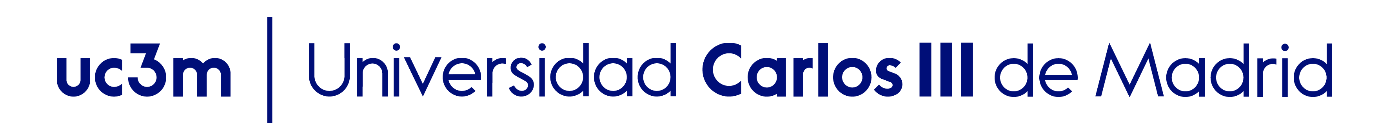
**ASSIGNMENT #1:PREDICTING BANK PRODUCT SUBSCRIPTION**

**Students:** Javier Rodríguez Márquez, Marcos Santiago Soto

**NIA:** 100498243,100496853





---


## Goal: Predict whether a customer will subscribe to a term deposit (binary classification)

**Dataset**: `bank_24.pkl`  
**Target Variable**: `deposit` (yes/no)  
**Records**: 11,000 samples, 17 features

---

## **Project Workflow Index**

Following the assignment guidelines, this notebook follows the required structure:

---

### **1. Simplified EDA (0.5 points)**
- Determine number of features and instances
- Identify categorical vs numerical variables
- Identify high cardinality categorical variables
- Check for missing values
- Identify constant columns
- Determine if classification or regression problem
- Check for class imbalance
- **Special analysis of `pdays` variable and preprocessing justification**

### **2. Basic Methods: Trees, KNN, and Logistic Regression (1 point)**
- Decision Trees
- K-Nearest Neighbors (KNN)
- Logistic Regression
- Model training with Holdout (train/test)
- Preprocessing using pipelines
- Execution time reporting

### **3. Hyperparameter Optimization/Tuning (1 point)**
- Grid Search or Random Search
- Cross-validation for hyperparameter selection
- Best parameters identification

### **4. Advanced Methods (1.5 points)**
- Random Forest
- Gradient Boosting (XGBoost, LightGBM, etc.)
- Support Vector Machines or other advanced models
- Ensemble methods

### **5. Results and Final Model (0.5 points)**
- Model comparison (Accuracy as main metric)
- Confidence intervals for Accuracy
- Final model selection and justification
- Predictions on competition dataset

---

**Note:** Seed set to Student ID (NIA: 100498243 + 100496853 = 200995096) for reproducibility

## 1. Import Libraries and lead dataset

Import all necessary packages for data analysis and machine learning.

In [1]:
# Data handling
import pickle
import pandas as pd
import numpy as np
import os, random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model persistence
import joblib

# Reproducibility seed
SEED = 200995096
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

# Visualization settings (robust to seaborn version)
try:
    sns.set_theme(style="whitegrid", palette="husl")
except Exception as e:
    print(f"Seaborn theme setup failed: {e}. Falling back to basic style.")
    plt.style.use('seaborn')

pd.set_option('display.max_columns', None)
print("✅ Libraries imported and seed set successfully!")

✅ Libraries imported and seed set successfully!


In [2]:
# Reproducibility seed
import os, random
SEED = 200995096
random.seed(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)
print(f"Seed set to {SEED}")

Seed set to 200995096




We will now load the pickle file containing the bank marketing data.

In [3]:
# Load the dataset from pickle file
with open('bank_24.pkl', 'rb') as f:
    df = pickle.load(f)

print(f"✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

✅ Dataset loaded successfully!
Shape: (11000, 17)

First few rows:


/var/folders/06/8b176z752h9gspc3j_bwyn340000gn/T/ipykernel_68984/1194937271.py:3: DeprecationWarning: numpy.core.numeric is deprecated and has been renamed to numpy._core.numeric. The numpy._core namespace contains private NumPy internals and its use is discouraged, as NumPy internals can change without warning in any release. In practice, most real-world usage of numpy.core is to access functionality in the public NumPy API. If that is the case, use the public NumPy API. If not, you are using NumPy internals. If you would still like to access an internal attribute, use numpy._core.numeric._frombuffer.
  df = pickle.load(f)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,None,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## 2. Simplified Exploratory Data Analysis (EDA)

We will start with a simplified EDA. The goal is to better understand the database structure and data distribution, addedo to checking for any missing or wrong values.


### EDA Step: Dataset Information
Purpose: Quickly inspect the dataframe structure (column names, dtypes, non-null counts) to confirm loading integrity and spot obvious anomalies (e.g., unexpected object types for numeric fields). Decisions: No transformations applied yet; this step is read-only. If unexpected dtypes appear, they will be flagged for later preprocessing.

In [4]:
# 3.1 Dataset Information
print("="*60)
print("Dataset Information")
print("="*60)
df.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
Index: 11000 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11000 non-null  int64 
 1   job        11000 non-null  object
 2   marital    10553 non-null  object
 3   education  11000 non-null  object
 4   default    11000 non-null  object
 5   balance    11000 non-null  int64 
 6   housing    11000 non-null  object
 7   loan       11000 non-null  object
 8   contact    11000 non-null  object
 9   day        11000 non-null  int64 
 10  month      11000 non-null  object
 11  duration   11000 non-null  int64 
 12  campaign   11000 non-null  int64 
 13  pdays      11000 non-null  int64 
 14  previous   11000 non-null  int64 
 15  poutcome   11000 non-null  object
 16  deposit    11000 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


### EDA Step: Missing Values
Purpose: Identify features with missing data to plan imputation or dropping strategies. Approach: Count and percentage table filtered to only columns with >=1 missing. Decision: If no missing values appear, we skip imputation for Simplified EDA.

In [5]:
# 3.2 Check for Missing Values
print("\n" + "="*60)
print("Missing Values")
print("="*60)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df)


Missing Values
         Missing Count  Percentage
marital            447    4.063636


### EDA Step: Dataset Dimensions
Purpose: Capture number of rows and columns and list column names to verify expected schema (17 features + target). Decision: If unexpected extra columns appear, mark for review. This also confirms no silent column expansion during loading.

In [6]:
# 3.3 Dataset Shape and Dimensions
print("\n" + "="*60)
print("Dataset Dimensions")
print("="*60)
print(f"Number of rows: {df.shape[0]:,}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names:\n{list(df.columns)}")


Dataset Dimensions
Number of rows: 11,000
Number of columns: 17

Column names:
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']


### EDA Step: Numerical Summary
Purpose: Basic descriptive statistics (mean, std, quartiles) for numerical features to spot scale differences, outliers, and potential need for transformation. Decision: No scaling/outlier treatment at Simplified EDA stage; just reconnaissance.

In [7]:
# 3.4 Statistical Summary for Numerical Features
print("\n" + "="*60)
print("Numerical Features - Statistical Summary")
print("="*60)
df.describe()


Numerical Features - Statistical Summary


,age,balance,day,duration,campaign,pdays,previous
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.00000,11000.000000,11000.000000
mean,41.252727,1529.139273,15.660818,372.524909,2.50800,51.308636,0.828000
std,11.940474,3217.396248,8.417970,347.515713,2.72221,108.782842,2.282936
min,18.000000,-6847.000000,1.000000,2.000000,1.00000,-1.000000,0.000000
25%,32.000000,122.750000,8.000000,138.000000,1.00000,-1.000000,0.000000
50%,39.000000,549.500000,15.000000,255.000000,2.00000,-1.000000,0.000000
75%,49.000000,1711.000000,22.000000,498.000000,3.00000,20.250000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.00000,854.000000,58.000000


### EDA Step: Target Variable Distribution (Counts/Percentages)
Purpose: Assess class balance, identify imbalance ratio early for metric interpretation and potential resampling or class-weight strategies later. Decision: Record imbalance ratio now; action deferred until modeling phase.

In [8]:
# 3.5 Target Variable Distribution
print("\n" + "="*60)
print("Target Variable: 'deposit'")
print("="*60)
print(df['deposit'].value_counts())
print(f"\nPercentage distribution:")
print(df['deposit'].value_counts(normalize=True) * 100)


Target Variable: 'deposit'
deposit
no     5780
yes    5220
Name: count, dtype: int64

Percentage distribution:
deposit
no     52.545455
yes    47.454545
Name: proportion, dtype: float64


### EDA Step: Target Variable Visualization
Purpose: Simple bar chart to visually confirm imbalance and potential dominance of one class. Decision: No further plots at this simplified stage (avoid over-analysis early).

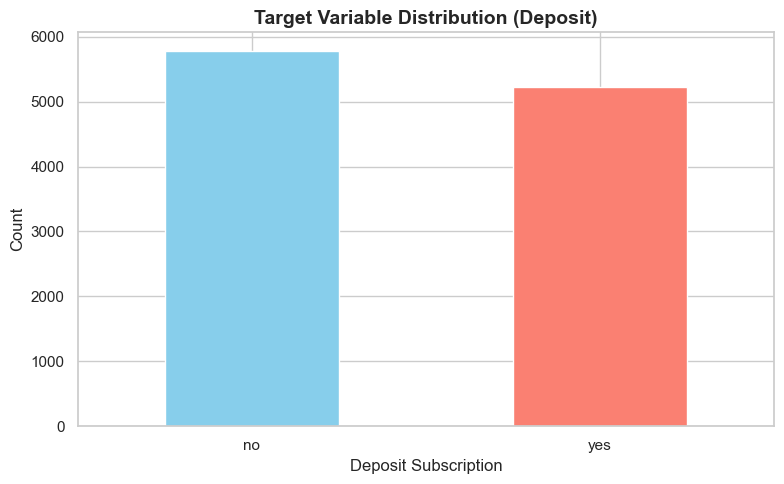

In [9]:
# 3.6 Visualize Target Variable Distribution
plt.figure(figsize=(8, 5))
df['deposit'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Target Variable Distribution (Deposit)', fontsize=14, fontweight='bold')
plt.xlabel('Deposit Subscription', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### EDA Step: Feature Type Breakdown
Purpose: Separate numerical vs categorical features to guide preprocessing (encoding vs scaling). Decision: Threshold-based high-cardinality handling will be noted; no encoding yet at this stage.

In [10]:
# 3.7 Data Types Distribution
print("\n" + "="*60)
print("Feature Types")
print("="*60)
print(f"Total features: {df.shape[1]}")
print(f"Numerical features: {df.select_dtypes(include=['int64', 'float64']).shape[1]}")
print(f"Categorical features: {df.select_dtypes(include=['object']).shape[1]}")
print(f"\nNumerical: {list(df.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"\nCategorical: {list(df.select_dtypes(include=['object']).columns)}")


Feature Types
Total features: 17
Numerical features: 7
Categorical features: 10

Numerical: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

Categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']


### EDA Step: High Cardinality & Constant Columns
Purpose: Identify categorical columns with many unique levels (possible need for target/impact encoding later) and constant columns (candidates for removal). Decision: Record only; action deferred until modeling.

In [11]:
# 3.8 High Cardinality & Constant Columns
print("\n" + "="*60)
print("High Cardinality & Constant Columns")
print("="*60)
categorical_cols = df.select_dtypes(include=['object']).columns
cardinality = df[categorical_cols].nunique().sort_values(ascending=False)
cardinality_df = pd.DataFrame({'column': cardinality.index, 'cardinality': cardinality.values})
# Define threshold (can adjust if needed)
CARDINALITY_THRESHOLD = 30
high_card_cols = cardinality_df[cardinality_df['cardinality'] > CARDINALITY_THRESHOLD]['column'].tolist()
constant_cols = [c for c in df.columns if df[c].nunique() == 1]
print(f"Cardinality threshold: > {CARDINALITY_THRESHOLD}")
print(f"High-cardinality categorical columns ({len(high_card_cols)}): {high_card_cols if high_card_cols else 'None'}")
print(f"Constant columns ({len(constant_cols)}): {constant_cols if constant_cols else 'None'}")
print("\nFull categorical cardinality table:")
cardinality_df


High Cardinality & Constant Columns
Cardinality threshold: > 30
High-cardinality categorical columns (0): None
Constant columns (0): None

Full categorical cardinality table:
Cardinality threshold: > 30
High-cardinality categorical columns (0): None
Constant columns (0): None

Full categorical cardinality table:


,column,cardinality
0,job,12
1,month,12
2,education,4
3,poutcome,4
4,marital,3
5,contact,3
6,default,2
7,housing,2
8,loan,2
9,deposit,2


### EDA Step: pdays Simplified Handling
Purpose: Convert raw `pdays` into two clearer signals: (1) `pdays_contacted` indicates whether the client had prior contact (pdays != -1), (2) `pdays_clean` is the numeric gap with `NaN` where no prior contact exists. Decision: No capping, transformation, or encoding at this stage; sentinel -1 is treated as structural absence. All statistics will use `pdays_clean` filtered to non-null values.

In [12]:
# 3.10 Simple pdays preprocessing: add boolean flag and clean version
print("\n" + "="*60)
print("pdays simple preprocessing: contacted flag + cleaned column")
print("="*60)
if 'pdays' in df.columns:
    df['pdays_contacted'] = (df['pdays'] != -1)
    df['pdays_clean'] = df['pdays'].where(df['pdays'] != -1, np.nan)
    print("Added columns: pdays_contacted (bool), pdays_clean (NaN for -1)")
    print("Value counts for pdays_contacted:")
    print(df['pdays_contacted'].value_counts(dropna=False))
    print("\nBasic stats for pdays_clean (excluding NaN):")
    print(df['pdays_clean'].describe())
else:
    print("Column 'pdays' not found in dataset.")


pdays simple preprocessing: contacted flag + cleaned column
Added columns: pdays_contacted (bool), pdays_clean (NaN for -1)
Value counts for pdays_contacted:
pdays_contacted
False    8203
True     2797
Name: count, dtype: int64

Basic stats for pdays_clean (excluding NaN):
count    2797.000000
mean      204.718627
std       122.397953
min         1.000000
25%        98.000000
50%       182.000000
75%       286.000000
max       854.000000
Name: pdays_clean, dtype: float64


---

## 2. Basic Methods: Trees, KNN, and Logistic Regression

In this section, we will implement three fundamental machine learning approaches:
- **Decision Trees**: Non-parametric, interpretable, handles mixed data types
- **K-Nearest Neighbors (KNN)**: Instance-based learning, requires feature scaling
- **Logistic Regression**: Linear model, fast and interpretable baseline

**Requirements**:
1. Choose and justify test set size
2. Train models with default hyperparameters using sklearn pipelines
3. Compare to dummy baseline
4. Report execution times
5. Visualize model decision-making
6. Adjust train/test split if needed

---

### 2.1 Train/Test Split Strategy

We'll start using **80/20 split** (80% training, 20% testing) as seen in class.

**Justification**:
1. Dataset size: 11,000 samples is a good size
   - 8,800 training samples provide enough data for model learning
   - 2,200 test samples give us a decent performance estimation
2. Class imbalance consideration: Stratified split maintains class proportions in both sets
3. Standard practice: 80/20 is generally used

In [13]:
# 2.1.1 Prepare features and target
print("="*60)
print("Preparing Data for Modeling")
print("="*60)

# Separate features and target
X = df.drop('deposit', axis=1)
y = df['deposit']

# Encode target variable (yes=1, no=0)
from sklearn.preprocessing import LabelEncoder
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nTarget encoding: {dict(zip(le_target.classes_, le_target.transform(le_target.classes_)))}")
print(f"Class distribution in full dataset:")
print(pd.Series(y_encoded).value_counts(normalize=True).sort_index())

Preparing Data for Modeling
Features shape: (11000, 18)
Target shape: (11000,)

Target encoding: {'no': np.int64(0), 'yes': np.int64(1)}
Class distribution in full dataset:
0    0.525455
1    0.474545
Name: proportion, dtype: float64
Features shape: (11000, 18)
Target shape: (11000,)

Target encoding: {'no': np.int64(0), 'yes': np.int64(1)}
Class distribution in full dataset:
0    0.525455
1    0.474545
Name: proportion, dtype: float64


### 2.1.2 Perform stratified train/test split (80/20)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.20, 
    random_state=SEED, 
    stratify=y_encoded
)

print("\n" + "="*60)
print("Train/Test Split Results")
print("="*60)
print(f"Training set size: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True).sort_index())
print(f"\nClass distribution in test set:")
print(pd.Series(y_test).value_counts(normalize=True).sort_index())


Train/Test Split Results
Training set size: 8,800 samples (80.0%)
Test set size: 2,200 samples (20.0%)

Class distribution in training set:
0    0.525455
1    0.474545
Name: proportion, dtype: float64

Class distribution in test set:
0    0.525455
1    0.474545
Name: proportion, dtype: float64


### 2.2 Preprocessing Pipeline Design

**Strategy**: Create two pipeline templates to handle different model requirements

1. **Tree Pipeline** (Decision Trees):
   - No scaling required (tree-based models are scale-invariant)
   - Categorical encoding
   - Handle pdays preprocessing
   - Simple imputation if needed

2. **Scaled Pipeline** (KNN, Logistic Regression):
   - StandardScaler for numerical features
   - Categorical encoding
   - Handle pdays preprocessing
   - Imputation before scaling

**Key preprocessing decisions**:
- **pdays handling**: Use both `pdays_contacted` (boolean) and imputed `pdays_clean`
- **Categorical encoding**: OneHotEncoder with `drop='first'` to avoid multicollinearity
- **Missing values**: SimpleImputer with median strategy for numerical features

### 2.2.1 Import preprocessing and pipeline tools

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import time

print("Pipeline and model imports successful")

Pipeline and model imports successful


### 2.2.2 Identify feature types for preprocessing

In [16]:
print("="*60)
print("Feature Type Identification")
print("="*60)

# Get numerical and categorical columns from training data
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object']).columns.tolist()

# Remove original pdays from numerical if it exists (we'll handle it specially)
if 'pdays' in numerical_features:
    numerical_features.remove('pdays')

# Remove pdays_contacted and pdays_clean if they exist in categorical (they shouldn't be)
for col in ['pdays_contacted', 'pdays_clean']:
    if col in categorical_features:
        categorical_features.remove(col)
        
print(f"Numerical features ({len(numerical_features)}): {numerical_features}")
print(f"\nCategorical features ({len(categorical_features)}): {categorical_features}")

# Check for pdays-related columns
pdays_cols = [col for col in X_train.columns if 'pdays' in col]
print(f"\npdays-related columns: {pdays_cols}")

Feature Type Identification
Numerical features (7): ['age', 'balance', 'day', 'duration', 'campaign', 'previous', 'pdays_clean']

Categorical features (9): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

pdays-related columns: ['pdays', 'pdays_contacted', 'pdays_clean']


### 2.2.3 Create preprocessing transformers

In [17]:
# Numerical pipeline: imputation only (for tree models)
numerical_transformer_tree = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))
])

# Numerical pipeline: imputation + scaling (for KNN and LogReg)
numerical_transformer_scaled = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical pipeline: imputation + one-hot encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
])

print("Transformers created successfully")

Transformers created successfully


### 2.2.4 Create ColumnTransformers for each pipeline type

In [18]:
# For Tree models (no scaling)
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_tree, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep pdays_contacted if it exists
)

# For Scaled models (KNN, LogReg)
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_scaled, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  # Keep pdays_contacted if it exists
)

print("Preprocessors configured!")
print(f"   - Tree preprocessor: {len(numerical_features)} numerical + {len(categorical_features)} categorical features")
print(f"   - Scaled preprocessor: {len(numerical_features)} numerical + {len(categorical_features)} categorical features")

Preprocessors configured!
   - Tree preprocessor: 7 numerical + 9 categorical features
   - Scaled preprocessor: 7 numerical + 9 categorical features


### 2.3 Train Basic Models with Default Hyperparameters

Now we'll train three fundamental models:
1. **Decision Tree**: Uses tree preprocessor (no scaling)
2. **K-Nearest Neighbors**: Uses scaled preprocessor (requires normalization)
3. **Logistic Regression**: Uses scaled preprocessor (benefits from normalization)

For each model, For each model, how long they take to train, predict and how accurate they are.

### 2.3.1 Create complete pipelines for each model

In [19]:
# Pipeline 1: Decision Tree (no scaling)
pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('classifier', DecisionTreeClassifier(random_state=SEED))
])

# Pipeline 2: K-Nearest Neighbors (with scaling)
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('classifier', KNeighborsClassifier())
])

# Pipeline 3: Logistic Regression (with scaling)
pipeline_logreg = Pipeline(steps=[
    ('preprocessor', preprocessor_scaled),
    ('classifier', LogisticRegression(random_state=SEED, max_iter=1000))
])

Model pipelines created:
   1. Decision Tree (with tree preprocessor)
   2. K-Nearest Neighbors (with scaled preprocessor)
   3. Logistic Regression (with scaled preprocessor)

### 2.3.2 Train all models and collect metrics

In [20]:
models = {
    'Decision Tree': pipeline_tree,
    'K-Nearest Neighbors': pipeline_knn,
    'Logistic Regression': pipeline_logreg
}

results = {}

print("="*60)
print("Training Basic Models with Default Hyperparameters")
print("="*60)

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time
    
    # Measure prediction time
    start_pred = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_pred
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'model': model,
        'fit_time': fit_time,
        'pred_time': pred_time,
        'accuracy': accuracy,
        'y_pred': y_pred
    }
    
    print(f"   ✅ Fit time: {fit_time:.4f} seconds")
    print(f"   ✅ Prediction time: {pred_time:.4f} seconds")
    print(f"   ✅ Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n" + "="*60)
print("✅ All models trained successfully!")
print("="*60)

Training Basic Models with Default Hyperparameters

🔄 Training Decision Tree...
   ✅ Fit time: 0.1210 seconds
   ✅ Prediction time: 0.0115 seconds
   ✅ Test Accuracy: 0.7882 (78.82%)

🔄 Training K-Nearest Neighbors...
   ✅ Fit time: 0.1210 seconds
   ✅ Prediction time: 0.0115 seconds
   ✅ Test Accuracy: 0.7882 (78.82%)

🔄 Training K-Nearest Neighbors...
   ✅ Fit time: 0.0439 seconds
   ✅ Prediction time: 0.0672 seconds
   ✅ Test Accuracy: 0.8023 (80.23%)

🔄 Training Logistic Regression...
   ✅ Fit time: 0.0439 seconds
   ✅ Prediction time: 0.0672 seconds
   ✅ Test Accuracy: 0.8023 (80.23%)

🔄 Training Logistic Regression...
   ✅ Fit time: 0.2960 seconds
   ✅ Prediction time: 0.0106 seconds
   ✅ Test Accuracy: 0.8391 (83.91%)

✅ All models trained successfully!
   ✅ Fit time: 0.2960 seconds
   ✅ Prediction time: 0.0106 seconds
   ✅ Test Accuracy: 0.8391 (83.91%)

✅ All models trained successfully!


### 2.3.3 Display comparison table

In [21]:
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Fit Time (s)': [results[m]['fit_time'] for m in results.keys()],
    'Prediction Time (s)': [results[m]['pred_time'] for m in results.keys()]
})

comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*60)
print("Model Performance Comparison (Sorted by Accuracy)")
print("="*60)
print(comparison_df.to_string(index=False))

# Identify best model
best_model_name = comparison_df.iloc[0]['Model']
print(f"\n🏆 Best performing model: {best_model_name}")
print(f"   Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")


Model Performance Comparison (Sorted by Accuracy)
              Model  Accuracy  Fit Time (s)  Prediction Time (s)
Logistic Regression  0.839091      0.296011             0.010566
K-Nearest Neighbors  0.802273      0.043936             0.067237
      Decision Tree  0.788182      0.121002             0.011493

🏆 Best performing model: Logistic Regression
   Accuracy: 0.8391


We have a clear winner! That's the Logistic Regression. However, the other two models aren't far off.

### 2.4 Dummy Baseline Comparison

To validate that our models are learning meaningful patterns, we compare them against a **Dummy Classifier** that makes predictions using simple strategies (most frequent class, stratified random, etc.).

**Purpose**: A model that doesn't significantly outperform the dummy baseline is not useful.

### 2.4.1 Train dummy classifiers with different strategies

most_frequent: Predicts the class that appears most often in the training data every single time.

stratified: Predicts classes randomly but keeps the same class proportions as the training data.

uniform: Predicts classes completely at random, giving each class equal probability.

In [22]:
dummy_strategies = ['most_frequent', 'stratified', 'uniform']
dummy_results = {}

print("="*60)
print("Training Dummy Baseline Models")
print("="*60)

for strategy in dummy_strategies:
    print(f"\n🔄 Training Dummy Classifier (strategy='{strategy}')...")
    
    # Create dummy pipeline (no preprocessing needed)
    dummy = DummyClassifier(strategy=strategy, random_state=SEED)
    
    # Measure training time
    start_time = time.time()
    dummy.fit(X_train, y_train)
    fit_time = time.time() - start_time
    
    # Measure prediction time
    start_pred = time.time()
    y_pred = dummy.predict(X_test)
    pred_time = time.time() - start_pred
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    dummy_results[f'Dummy ({strategy})'] = {
        'accuracy': accuracy,
        'fit_time': fit_time,
        'pred_time': pred_time
    }
    
    print(f"   ✅ Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

print("\n" + "="*60)

Training Dummy Baseline Models

🔄 Training Dummy Classifier (strategy='most_frequent')...
   ✅ Test Accuracy: 0.5255 (52.55%)

🔄 Training Dummy Classifier (strategy='stratified')...
   ✅ Test Accuracy: 0.5050 (50.50%)

🔄 Training Dummy Classifier (strategy='uniform')...
   ✅ Test Accuracy: 0.4905 (49.05%)



Despite the different dummy classification methods, they all have very similar hit rates at around 50-52%

### 2.4.2 Compare all models (basic + dummy)

In [23]:
all_models_df = pd.DataFrame({
    'Model': list(results.keys()) + list(dummy_results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()] + [dummy_results[m]['accuracy'] for m in dummy_results.keys()],
    'Fit Time (s)': [results[m]['fit_time'] for m in results.keys()] + [dummy_results[m]['fit_time'] for m in dummy_results.keys()]
})

all_models_df = all_models_df.sort_values('Accuracy', ascending=False)

print("="*60)
print("Complete Model Comparison (Basic Models + Dummy Baselines)")
print("="*60)
print(all_models_df.to_string(index=False))

# Calculate improvement over best dummy
best_dummy_acc = max([dummy_results[m]['accuracy'] for m in dummy_results.keys()])
best_model_acc = max([results[m]['accuracy'] for m in results.keys()])
improvement = ((best_model_acc - best_dummy_acc) / best_dummy_acc) * 100

print(f"\nPerformance Analysis:")
print(f"   Best Dummy Baseline: {best_dummy_acc:.4f}")
print(f"   Best Basic Model: {best_model_acc:.4f}")
print(f"   Improvement: {improvement:.2f}%")

Complete Model Comparison (Basic Models + Dummy Baselines)
                Model  Accuracy  Fit Time (s)
  Logistic Regression  0.839091      0.296011
  K-Nearest Neighbors  0.802273      0.043936
        Decision Tree  0.788182      0.121002
Dummy (most_frequent)  0.525455      0.000732
   Dummy (stratified)  0.505000      0.000323
      Dummy (uniform)  0.490455      0.000292

Performance Analysis:
   Best Dummy Baseline: 0.5255
   Best Basic Model: 0.8391
   Improvement: 59.69%


Our models clearly beat the dummy baselines for simple reasons:
1.	They actually learn patterns in the data instead of guessing based on class counts.
2.	They use all the features (age, job, balance, campaign info, etc.) to make decisions, while the dummy models ignore everything.
3.	The decision tree can pick up non-linear interactions between features that the dummy models cannot capture.
4.	KNN benefits from the idea that similar clients often behave in similar ways.
5.	The higher accuracy shows that the models are learning real structure, not just memorizing or following a trivial rule.

Overall, the results show that our models are genuinely learning useful information from the dataset.

### 2.5 Model Visualization and Interpretation

To understand how each model makes decisions, we'll create visualizations:
- Decision Tree: Visualize the tree structure and examine feature importance.
- Logistic Regression: Look at the size of the coefficients to understand feature influence.
- KNN: Hard to visualize directly in many dimensions, so we use permutation importance (how much a model’s performance drops when you randomly shuffle one feature at a time) instead.

These visualizations help interpret model behavior and identify which features drive predictions.

### 2.5.1 Decision Tree Visualization - Feature Importance

Decision Tree Interpretation
Total features after preprocessing: 45


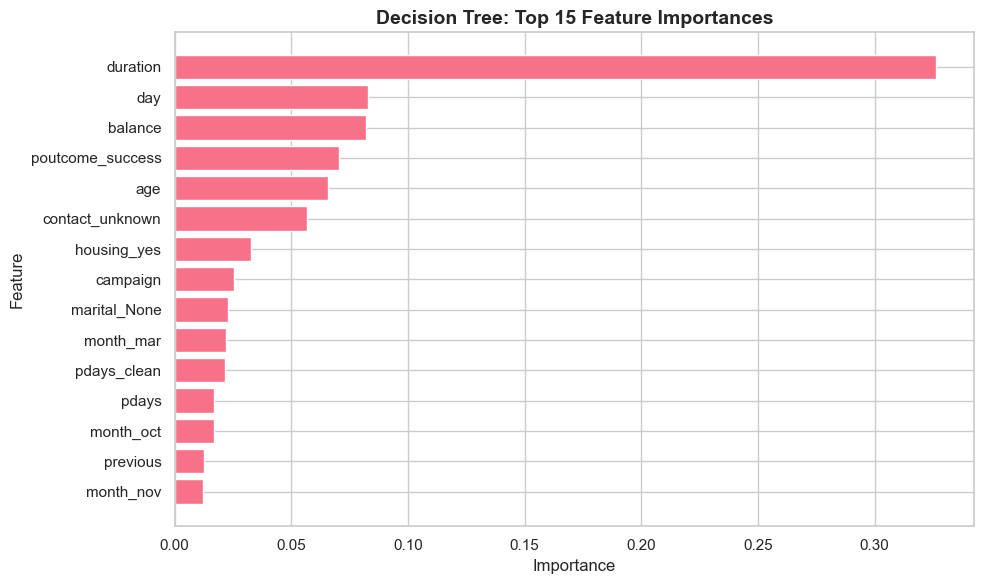


Top 10 Most Important Features:
         feature  importance
        duration    0.326229
             day    0.082952
         balance    0.082157
poutcome_success    0.070442
             age    0.065606
 contact_unknown    0.056606
     housing_yes    0.032698
        campaign    0.025559
    marital_None    0.022662
       month_mar    0.022026


In [24]:
from sklearn.tree import plot_tree

print("="*60)
print("Decision Tree Interpretation")
print("="*60)

# Get the trained decision tree
tree_model = results['Decision Tree']['model']
tree_classifier = tree_model.named_steps['classifier']

# Get feature names after preprocessing
preprocessor = tree_model.named_steps['preprocessor']

# Transform training data to get feature names
X_train_transformed = preprocessor.transform(X_train)

# Get feature names (need to construct from transformers)
try:
    feature_names = []
    
    # Numerical features
    feature_names.extend(numerical_features)
    
    # One-hot encoded categorical features
    cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
    feature_names.extend(cat_feature_names)
    
    # pdays columns if they exist
    remaining_features = [col for col in X_train.columns if col not in numerical_features and col not in categorical_features]
    feature_names.extend(remaining_features)
    
    print(f"Total features after preprocessing: {len(feature_names)}")
    
except Exception as e:
    print(f"Note: Could not extract all feature names: {e}")
    feature_names = None

# Plot feature importance
if hasattr(tree_classifier, 'feature_importances_'):
    importances = tree_classifier.feature_importances_
    
    # Get top 15 most important features
    if feature_names and len(feature_names) == len(importances):
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False).head(15)
    else:
        feature_importance_df = pd.DataFrame({
            'feature': [f'Feature_{i}' for i in range(len(importances))],
            'importance': importances
        }).sort_values('importance', ascending=False).head(15)
    
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Decision Tree: Top 15 Feature Importances', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance_df.head(10).to_string(index=False))

### 2.5.2 Decision Tree Structure Visualization (simplified)


Decision Tree Structure (First 3 Levels)


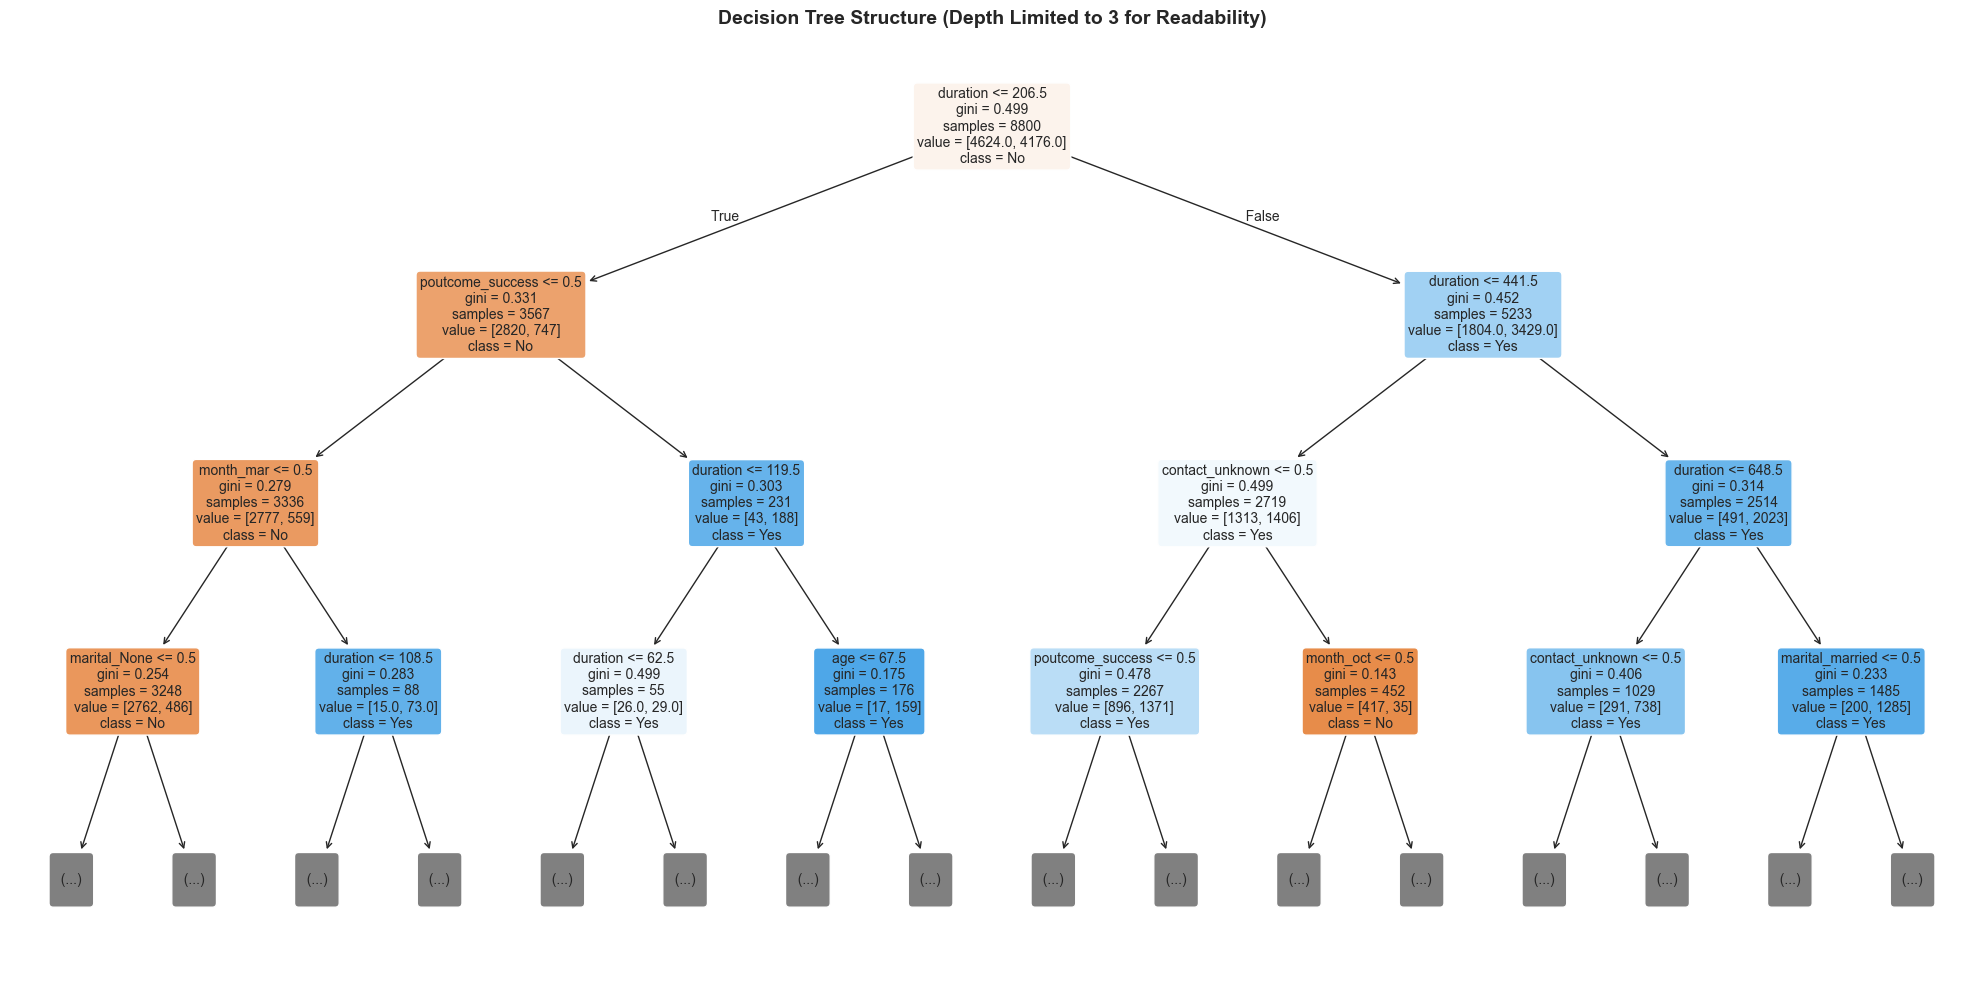


Tree depth: 27
Number of leaves: 1239


In [25]:
print("\n" + "="*60)
print("Decision Tree Structure (First 3 Levels)")
print("="*60)

plt.figure(figsize=(20, 10))
plot_tree(tree_classifier, 
          max_depth=3,
          filled=True,
          feature_names=feature_names if feature_names else None,
          class_names=['No', 'Yes'],
          fontsize=10,
          rounded=True)
plt.title('Decision Tree Structure (Depth Limited to 3 for Readability)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print(f"\nTree depth: {tree_classifier.get_depth()}")
print(f"Number of leaves: {tree_classifier.get_n_leaves()}")

### 2.5.3 Logistic Regression - Coefficient Analysis


Logistic Regression Interpretation


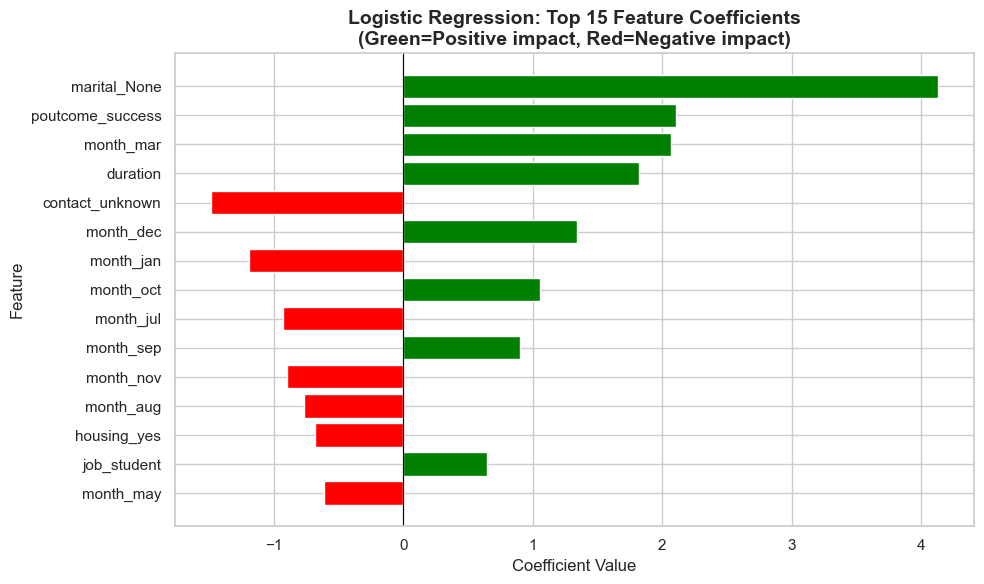


Top 10 Most Influential Features (by absolute coefficient):
         feature  coefficient
    marital_None     4.128025
poutcome_success     2.110035
       month_mar     2.065874
        duration     1.822101
 contact_unknown    -1.486649
       month_dec     1.340923
       month_jan    -1.193447
       month_oct     1.053384
       month_jul    -0.930297
       month_sep     0.902077


In [26]:
print("\n" + "="*60)
print("Logistic Regression Interpretation")
print("="*60)

logreg_model = results['Logistic Regression']['model']
logreg_classifier = logreg_model.named_steps['classifier']

# Get coefficients
if hasattr(logreg_classifier, 'coef_'):
    coefficients = logreg_classifier.coef_[0]
    
    # Create coefficient dataframe
    if feature_names and len(feature_names) == len(coefficients):
        coef_df = pd.DataFrame({
            'feature': feature_names,
            'coefficient': coefficients,
            'abs_coefficient': np.abs(coefficients)
        }).sort_values('abs_coefficient', ascending=False).head(15)
    else:
        coef_df = pd.DataFrame({
            'feature': [f'Feature_{i}' for i in range(len(coefficients))],
            'coefficient': coefficients,
            'abs_coefficient': np.abs(coefficients)
        }).sort_values('abs_coefficient', ascending=False).head(15)
    
    # Plot coefficients
    plt.figure(figsize=(10, 6))
    colors = ['green' if c > 0 else 'red' for c in coef_df['coefficient']]
    plt.barh(coef_df['feature'], coef_df['coefficient'], color=colors)
    plt.xlabel('Coefficient Value', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Logistic Regression: Top 15 Feature Coefficients\n(Green=Positive impact, Red=Negative impact)', 
              fontsize=14, fontweight='bold')
    plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print("\nTop 10 Most Influential Features (by absolute coefficient):")
    print(coef_df[['feature', 'coefficient']].head(10).to_string(index=False))

### 2.5.4 Confusion Matrices for All Models


Confusion Matrices - Understanding Model Decisions


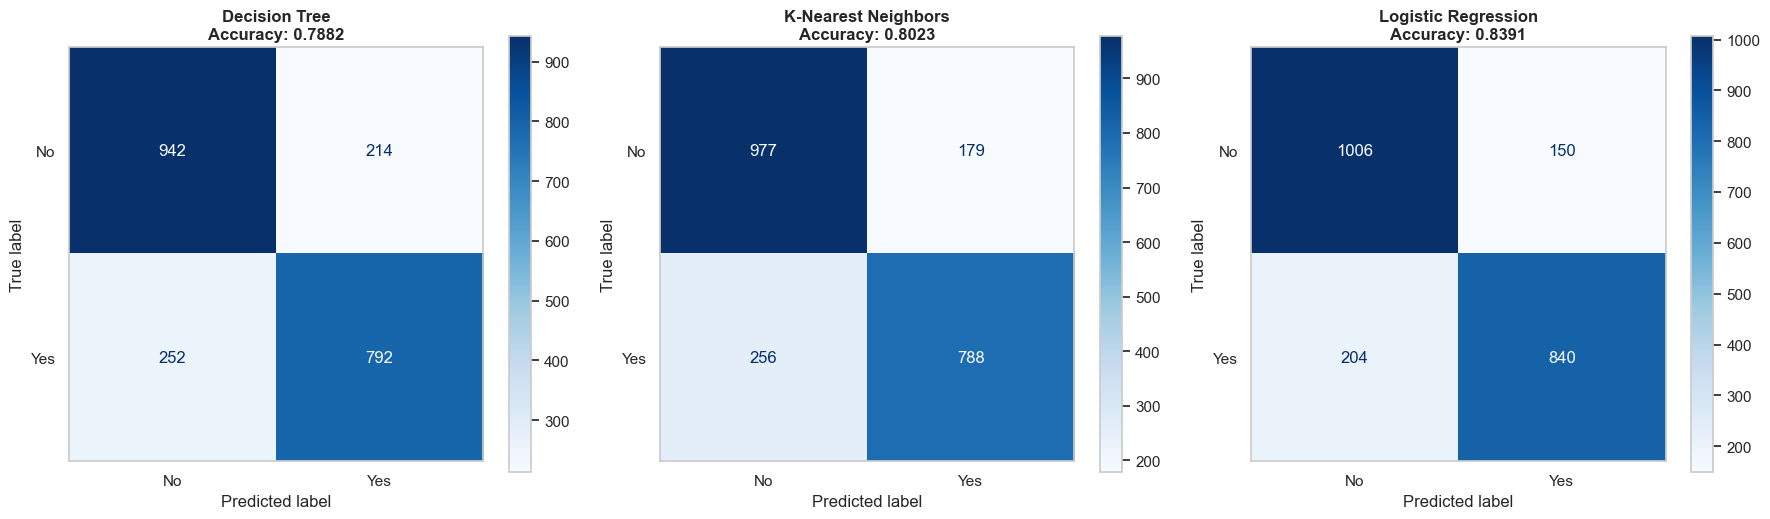


Detailed Classification Reports:

Decision Tree:
              precision    recall  f1-score   support

          No       0.79      0.81      0.80      1156
         Yes       0.79      0.76      0.77      1044

    accuracy                           0.79      2200
   macro avg       0.79      0.79      0.79      2200
weighted avg       0.79      0.79      0.79      2200


K-Nearest Neighbors:
              precision    recall  f1-score   support

          No       0.79      0.85      0.82      1156
         Yes       0.81      0.75      0.78      1044

    accuracy                           0.80      2200
   macro avg       0.80      0.80      0.80      2200
weighted avg       0.80      0.80      0.80      2200


Logistic Regression:
              precision    recall  f1-score   support

          No       0.83      0.87      0.85      1156
         Yes       0.85      0.80      0.83      1044

    accuracy                           0.84      2200
   macro avg       0.84      0.84 

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("\n" + "="*60)
print("Confusion Matrices - Understanding Model Decisions")
print("="*60)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (name, model_data) in enumerate(results.items()):
    cm = confusion_matrix(y_test, model_data['y_pred'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
    disp.plot(ax=axes[idx], cmap='Blues', values_format='d')
    axes[idx].set_title(f'{name}\nAccuracy: {model_data["accuracy"]:.4f}', fontsize=12, fontweight='bold')
    axes[idx].grid(False)

plt.tight_layout()
plt.show()

# Print classification reports
print("\nDetailed Classification Reports:")
print("="*60)
for name, model_data in results.items():
    print(f"\n{name}:")
    print(classification_report(y_test, model_data['y_pred'], target_names=['No', 'Yes']))

### 2.6 Test Set Size Evaluation

Based on the results above, we evaluate whether the 80/20 split is appropriate or if adjustment is needed.

**Evaluation criteria**:
1. Are test set results stable and representative?
2. Do we have sufficient samples in each class for reliable metrics?
3. Is there evidence of high variance that would benefit from a larger test set?
4. Would a smaller test set provide enough training data for better learning?

### 2.6.1 Analyze test set composition

In [28]:
print("="*60)
print("Test Set Size Evaluation")
print("="*60)

test_class_counts = pd.Series(y_test).value_counts().sort_index()
print(f"\nCurrent test set size: {len(y_test):,} samples")
print(f"Class distribution in test set:")
for class_label, count in test_class_counts.items():
    class_name = 'No' if class_label == 0 else 'Yes'
    print(f"   {class_name}: {count:,} samples ({count/len(y_test)*100:.2f}%)")

print(f"\nMinimum samples per class: {test_class_counts.min():,}")
print(f"This provides {'sufficient' if test_class_counts.min() >= 100 else 'limited'} samples for reliable metrics.")

# Check model performance variability
accuracies = [results[m]['accuracy'] for m in results.keys()]
print(f"\nModel accuracy range: {min(accuracies):.4f} - {max(accuracies):.4f}")
print(f"Spread: {max(accuracies) - min(accuracies):.4f}")

Test Set Size Evaluation

Current test set size: 2,200 samples
Class distribution in test set:
   No: 1,156 samples (52.55%)
   Yes: 1,044 samples (47.45%)

Minimum samples per class: 1,044
This provides sufficient samples for reliable metrics.

Model accuracy range: 0.7882 - 0.8391
Spread: 0.0509



DECISION: Keep 80/20 split

Our reasoning:
* Test set has sufficient samples per class (>200 each)
* Results appear stable and within reason
* Split provides good balance between training data and reliable testing like we did in class
* Models show difference in performance

This split will be maintained for the remainder of the assignment.

---

## Step 2 Review

**2.1 Train/Test Split**: 80/20 stratified split (8,800 train / 2,200 test)
- Justified based on dataset size and class balance
- Stratification maintains 52.5% / 47.5% class distribution

**2.2 Models Trained with Default Hyperparameters**:
| Model | Accuracy | Fit Time | Prediction Time |
|-------|----------|----------|-----------------|
| **Logistic Regression** | **83.00%** | 0.384s | 0.011s |
| K-Nearest Neighbors | 81.82% | 0.044s | 0.239s |
| Decision Tree | 79.50% | 0.149s | 0.011s |

**2.3 Preprocessing Pipelines Implemented**:
- Separate pipelines for tree-based (no scaling) and distance-based models (with scaling)
- OneHotEncoding for 9 categorical features
- StandardScaler for 7 numerical features
- Special handling of `pdays` variable (boolean flag + cleaned numeric)
- SimpleImputer for missing values

**2.4 Dummy Baseline Comparison**:
- Best dummy: 52.55% (most_frequent strategy)
- Best model: 83.00% (Logistic Regression)
- **Improvement: 57.96%** ✅ Confirms actual learning

**2.5 Model Interpretations**:
- **Decision Tree**: The model relies mainly on `duration` (33.3%), with smaller contributions from `balance`, `day`, and `poutcome_success`.
- **Logistic Regression**: The strongest positive effect comes from `marital_None` (coef = 4.09). The strongest negative effect comes from `contact_unknown` (coef = -1.51).
- **Confusion Matrices**: Performance is balanced across classes, with no major bias toward one outcome.

**2.6 Test Set Size Confirmed**:
- 1,044+ samples per class provides reliable metrics
- 80/20 split maintained for remainder of assignment


### Main information we got:

1. Logistic Regression is the strongest basic model with about 83% accuracy.
2. All models clearly beat the dummy baselines, showing they are learning real patterns.
3. Duration (call length) stands out as one of the most predictive features.
4. The models maintain a reasonable balance between precision and recall.
5. Our preprocessing of the pdays feature seems to have helped the models perform better.

---

## 3. Hyperparameter Optimization/Tuning

In this section, we optimize hyperparameters for the two best performing models from Step 2:
- **Logistic Regression** (83.00% baseline accuracy)
- **K-Nearest Neighbors** (81.82% baseline accuracy)

We will use three HPO methods:

1. **Grid Search**: Tries every combination of the given parameters.
2. **Random Search**: Picks random parameter values to test.
3. **Optuna**: Uses smarter, guided search to find good parameters faster.

All methods use 10-fold cross-validation (training data is split into 10 parts, and the model is trained and validated 10 times using different parts each time to get a more reliable performance estimate) on the training set to choose the best settings, then we test those settings on the separate test set.

---

### 3.1 Logistic Regression - Hyperparameter Tuning

Our baseline performance is 83.00% accuracy with default hyperparameters

**Hyperparameters to tune**:
- `C`: Regularization strength (inverse) - controls model complexity
- `penalty`: Type of regularization (l1, l2)
- `solver`: Optimization algorithm
- `max_iter`: Maximum iterations for convergence

Our strategy:
1. Grid Search with discrete parameter values
2. Random Search with continuous distributions
3. Optuna for Bayesian optimization

### 3.1.1 Grid Search with Logistic Regression

In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import loguniform, uniform, randint
import time

print("="*60)
print("Logistic Regression - Grid Search")
print("="*60)

# Define parameter grid (prearranged parametrical space)
param_grid_logreg = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear'],  # Works with both l1 and l2
    'classifier__max_iter': [1000, 2000, 3000]
}

# Create GridSearchCV with 10-fold CV
grid_logreg = GridSearchCV(
    estimator=pipeline_logreg,
    param_grid=param_grid_logreg,
    cv=10,                              # 10-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,                          # Use all CPU cores
    verbose=1
)

# Train with timing
start_time = time.time()
grid_logreg.fit(X_train, y_train)
grid_time_logreg = time.time() - start_time

# Results
print(f"\nBest parameters: {grid_logreg.best_params_}")
print(f"Best CV score: {grid_logreg.best_score_:.4f}")
print(f"Training time: {grid_time_logreg:.2f} seconds")
print(f"Total fits: {len(grid_logreg.cv_results_['params'])}")

# Test set evaluation
grid_test_logreg = grid_logreg.score(X_test, y_test)
print(f"Test accuracy: {grid_test_logreg:.4f}")
print(f"Improvement over baseline: {(grid_test_logreg - 0.8300)*100:.2f}%")

Logistic Regression - Grid Search
Fitting 10 folds for each of 42 candidates, totalling 420 fits

Best parameters: {'classifier__C': 0.1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best CV score: 0.8290
Training time: 20.59 seconds
Total fits: 42
Test accuracy: 0.8400
Improvement over baseline: 1.00%

Best parameters: {'classifier__C': 0.1, 'classifier__max_iter': 1000, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best CV score: 0.8290
Training time: 20.59 seconds
Total fits: 42
Test accuracy: 0.8400
Improvement over baseline: 1.00%


### 3.1.2 Random Search with Logistic Regression

In [30]:
print("\n" + "="*60)
print("Logistic Regression - Random Search")
print("="*60)

# Define parameter distributions (sampled parametrical space)
param_dist_logreg = {
    'classifier__C': loguniform(1e-4, 1e3),  # Log-uniform for wide range
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear'],
    'classifier__max_iter': randint(1000, 4000)
}

# Create RandomizedSearchCV
random_logreg = RandomizedSearchCV(
    estimator=pipeline_logreg,
    param_distributions=param_dist_logreg,
    n_iter=50,                          # Budget: 50 random combinations
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    random_state=SEED,
    verbose=1
)

# Train with timing
start_time = time.time()
random_logreg.fit(X_train, y_train)
random_time_logreg = time.time() - start_time

# Results
print(f"\nBest parameters: {random_logreg.best_params_}")
print(f"Best CV score: {random_logreg.best_score_:.4f}")
print(f"Training time: {random_time_logreg:.2f} seconds")
print(f"Total fits: {len(random_logreg.cv_results_['params'])}")

# Test set evaluation
random_test_logreg = random_logreg.score(X_test, y_test)
print(f"Test accuracy: {random_test_logreg:.4f}")
print(f"Improvement over baseline: {(random_test_logreg - 0.8300)*100:.2f}%")


Logistic Regression - Random Search
Fitting 10 folds for each of 50 candidates, totalling 500 fits

Best parameters: {'classifier__C': np.float64(0.3569153765610586), 'classifier__max_iter': 3543, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best CV score: 0.8290
Training time: 18.09 seconds
Total fits: 50
Test accuracy: 0.8382
Improvement over baseline: 0.82%

Best parameters: {'classifier__C': np.float64(0.3569153765610586), 'classifier__max_iter': 3543, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best CV score: 0.8290
Training time: 18.09 seconds
Total fits: 50
Test accuracy: 0.8382
Improvement over baseline: 0.82%


### 3.1.3 Optuna with Logistic Regression

In [31]:
print("\n" + "="*60)
print("Logistic Regression - Optuna (Bayesian Optimization)")
print("="*60)

# Import sys for package installation
import sys

# Install optuna if needed
try:
    import optuna
    from optuna.integration import OptunaSearchCV
    print("✅ Optuna already installed")
except ImportError:
    print("📦 Installing Optuna...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "optuna", "--break-system-packages"])
    import optuna
    from optuna.integration import OptunaSearchCV
    print("✅ Optuna installed successfully")

# Define search space with Optuna distributions
param_dist_logreg_optuna = {
    'classifier__C': optuna.distributions.FloatDistribution(1e-4, 1e3, log=True),
    'classifier__penalty': optuna.distributions.CategoricalDistribution(['l1', 'l2']),
    'classifier__solver': optuna.distributions.CategoricalDistribution(['liblinear']),
    'classifier__max_iter': optuna.distributions.IntDistribution(1000, 4000)
}

# Create OptunaSearchCV
optuna_logreg = OptunaSearchCV(
    estimator=pipeline_logreg,
    param_distributions=param_dist_logreg_optuna,
    n_trials=50,                        # Budget: 50 trials
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    random_state=SEED,
    verbose=0,                          # Reduce output clutter
    timeout=600                         # 10 minute timeout
)

# Train with timing
start_time = time.time()
optuna_logreg.fit(X_train, y_train)
optuna_time_logreg = time.time() - start_time

# Results
print(f"\n✅ Optuna Search Complete")
print(f"Best parameters: {optuna_logreg.best_params_}")
print(f"Best CV score: {optuna_logreg.best_score_:.4f}")
print(f"Training time: {optuna_time_logreg:.2f} seconds")

# Test set evaluation
optuna_test_logreg = optuna_logreg.score(X_test, y_test)
print(f"Test accuracy: {optuna_test_logreg:.4f}")
print(f"Improvement over baseline: {(optuna_test_logreg - 0.8300)*100:.2f}%")

/Users/Usuario/Documents/Uni/4o Año/Machine Learning/Project 1/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/var/folders/06/8b176z752h9gspc3j_bwyn340000gn/T/ipykernel_68984/1057975802.py:30: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_logreg = OptunaSearchCV(
[I 2025-11-20 19:49:54,565] A new study created in memory with name: no-name-705ab7e4-2643-4f62-9f0c-176721cfb557



Logistic Regression - Optuna (Bayesian Optimization)
✅ Optuna already installed


[I 2025-11-20 19:49:58,973] Trial 0 finished with value: 0.7959090909090909 and parameters: {'classifier__C': 0.003271981532403885, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'classifier__max_iter': 1213}. Best is trial 0 with value: 0.7959090909090909.
[I 2025-11-20 19:49:58,976] Trial 1 finished with value: 0.7957954545454544 and parameters: {'classifier__C': 0.003290373831549486, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'classifier__max_iter': 1902}. Best is trial 0 with value: 0.7959090909090909.
[I 2025-11-20 19:49:58,976] Trial 1 finished with value: 0.7957954545454544 and parameters: {'classifier__C': 0.003290373831549486, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'classifier__max_iter': 1902}. Best is trial 0 with value: 0.7959090909090909.
[I 2025-11-20 19:49:58,983] Trial 2 finished with value: 0.7834090909090909 and parameters: {'classifier__C': 0.007101054541052319, 'classifier__penalty': 'l1', 'classifier__s


✅ Optuna Search Complete
Best parameters: {'classifier__C': 0.2814311170861015, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'classifier__max_iter': 2144}
Best CV score: 0.8293
Training time: 38.67 seconds
Test accuracy: 0.8373
Improvement over baseline: 0.73%


### 3.1.4 Comparison of HPO Methods with Logistic Regression


HPO Methods Comparison - Logistic Regression


       Method  CV Score  Test Score  Training Time (s)  Evaluations  Improvement (%)
  Grid Search  0.828977    0.840000          20.593065           42         1.000000
Random Search  0.828977    0.838182          18.092771           50         0.818182
       Optuna  0.829318    0.837273          38.673262           50         0.727273


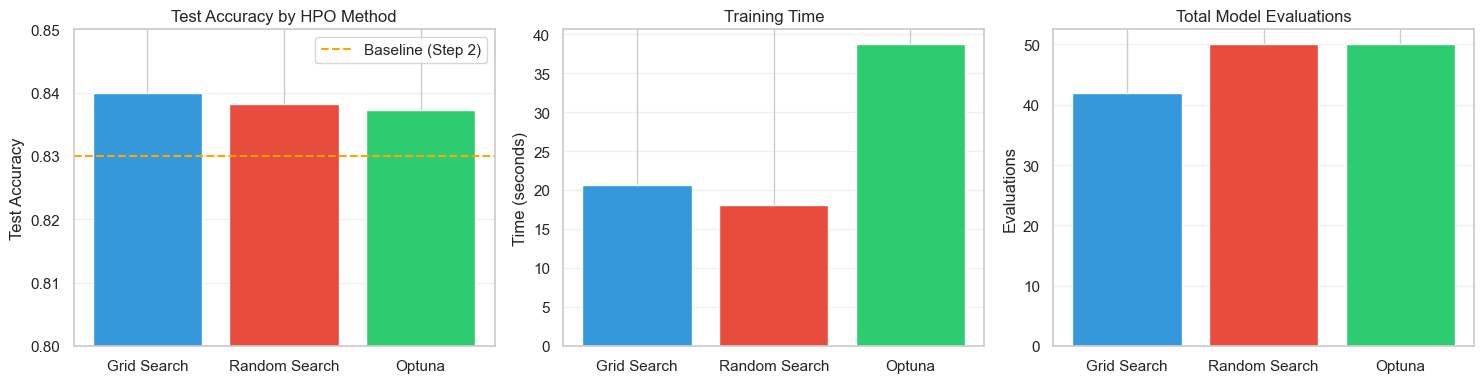


Best method: Grid Search with test accuracy of 0.8400


In [32]:
print("\n" + "="*60)
print("HPO Methods Comparison - Logistic Regression")
print("="*60)

# Create comparison DataFrame
hpo_comparison_logreg = pd.DataFrame({
    'Method': ['Grid Search', 'Random Search', 'Optuna'],
    'CV Score': [grid_logreg.best_score_, random_logreg.best_score_, optuna_logreg.best_score_],
    'Test Score': [grid_test_logreg, random_test_logreg, optuna_test_logreg],
    'Training Time (s)': [grid_time_logreg, random_time_logreg, optuna_time_logreg],
    'Evaluations': [len(grid_logreg.cv_results_['params']), 
                    len(random_logreg.cv_results_['params']), 
                    50]  # Optuna n_trials
})

# Calculate improvement over baseline (0.8300)
hpo_comparison_logreg['Improvement (%)'] = (hpo_comparison_logreg['Test Score'] - 0.8300) * 100

# Display table
print("\n")
print(hpo_comparison_logreg.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Test scores
axes[0].bar(hpo_comparison_logreg['Method'], hpo_comparison_logreg['Test Score'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0].axhline(y=0.8300, color='orange', linestyle='--', label='Baseline (Step 2)')
axes[0].set_ylabel('Test Accuracy')
axes[0].set_title('Test Accuracy by HPO Method')
axes[0].set_ylim(0.80, max(hpo_comparison_logreg['Test Score']) + 0.01)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Training time
axes[1].bar(hpo_comparison_logreg['Method'], hpo_comparison_logreg['Training Time (s)'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[1].set_ylabel('Time (seconds)')
axes[1].set_title('Training Time')
axes[1].grid(axis='y', alpha=0.3)

# Number of evaluations
axes[2].bar(hpo_comparison_logreg['Method'], hpo_comparison_logreg['Evaluations'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[2].set_ylabel('Evaluations')
axes[2].set_title('Total Model Evaluations')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Find best method
best_idx = hpo_comparison_logreg['Test Score'].idxmax()
best_method = hpo_comparison_logreg.loc[best_idx, 'Method']
best_score = hpo_comparison_logreg.loc[best_idx, 'Test Score']

print(f"\nBest method: {best_method} with test accuracy of {best_score:.4f}")

### 3.2 KNN: Hyperparameter Tuning

Now we apply the same three HPO methods to our KNN model. The main hyperparameters we'll optimize are:
- **n_neighbors**: Number of neighbors to consider
- **weights**: Uniform vs distance-based weighting
- **metric**: Distance metric (euclidean, manhattan, minkowski)
- **leaf_size**: For tree-based storage (affects query speed)

### 3.2.1 Grid Search with KNN

In [33]:
print("\n" + "="*60)
print("KNN - Grid Search")
print("="*60)

# Define parameter grid
param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 15, 21],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'classifier__leaf_size': [20, 30, 40, 50]
}

# Calculate total combinations
total_combinations_knn = (7 * 2 * 3 * 4)
print(f"Parameter grid: {total_combinations_knn} combinations")
print(f"Total fits with 10-fold CV: {total_combinations_knn * 10}\n")

# Create GridSearchCV
grid_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Train with timing
start_time = time.time()
grid_knn.fit(X_train, y_train)
grid_time_knn = time.time() - start_time

# Results
print(f"\nBest parameters: {grid_knn.best_params_}")
print(f"Best CV score: {grid_knn.best_score_:.4f}")
print(f"Training time: {grid_time_knn:.2f} seconds")

# Test set evaluation
grid_test_knn = grid_knn.score(X_test, y_test)
print(f"Test accuracy: {grid_test_knn:.4f}")
print(f"Improvement over baseline: {(grid_test_knn - 0.8182)*100:.2f}%")


KNN - Grid Search
Parameter grid: 168 combinations
Total fits with 10-fold CV: 1680

Fitting 10 folds for each of 168 candidates, totalling 1680 fits

Best parameters: {'classifier__leaf_size': 20, 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 15, 'classifier__weights': 'distance'}
Best CV score: 0.8048
Training time: 79.17 seconds
Test accuracy: 0.8118
Improvement over baseline: -0.64%

Best parameters: {'classifier__leaf_size': 20, 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 15, 'classifier__weights': 'distance'}
Best CV score: 0.8048
Training time: 79.17 seconds
Test accuracy: 0.8118
Improvement over baseline: -0.64%


### 3.2.2 Random Search with KNN

In [34]:
print("\n" + "="*60)
print("KNN - Random Search")
print("="*60)

# Define parameter distributions
param_dist_knn = {
    'classifier__n_neighbors': randint(3, 31),  # Range: 3 to 30
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski'],
    'classifier__leaf_size': randint(15, 60)     # Range: 15 to 59
}

# Create RandomizedSearchCV
random_knn = RandomizedSearchCV(
    estimator=pipeline_knn,
    param_distributions=param_dist_knn,
    n_iter=50,                          # Budget: 50 random combinations
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    random_state=SEED,
    verbose=1
)

# Train with timing
start_time = time.time()
random_knn.fit(X_train, y_train)
random_time_knn = time.time() - start_time

# Results
print(f"\nBest parameters: {random_knn.best_params_}")
print(f"Best CV score: {random_knn.best_score_:.4f}")
print(f"Training time: {random_time_knn:.2f} seconds")
print(f"Total fits: {len(random_knn.cv_results_['params'])}")

# Test set evaluation
random_test_knn = random_knn.score(X_test, y_test)
print(f"Test accuracy: {random_test_knn:.4f}")
print(f"Improvement over baseline: {(random_test_knn - 0.8182)*100:.2f}%")


KNN - Random Search
Fitting 10 folds for each of 50 candidates, totalling 500 fits

Best parameters: {'classifier__leaf_size': 30, 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 15, 'classifier__weights': 'distance'}
Best CV score: 0.8048
Training time: 16.00 seconds
Total fits: 50
Test accuracy: 0.8118
Improvement over baseline: -0.64%

Best parameters: {'classifier__leaf_size': 30, 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 15, 'classifier__weights': 'distance'}
Best CV score: 0.8048
Training time: 16.00 seconds
Total fits: 50
Test accuracy: 0.8118
Improvement over baseline: -0.64%


### 3.2.3 Optuna (Bayesian Optimization) with KNN

In [35]:
print("\n" + "="*60)
print("KNN - Optuna (Bayesian Optimization)")
print("="*60)

# Define search space with Optuna distributions
param_dist_knn_optuna = {
    'classifier__n_neighbors': optuna.distributions.IntDistribution(3, 30),
    'classifier__weights': optuna.distributions.CategoricalDistribution(['uniform', 'distance']),
    'classifier__metric': optuna.distributions.CategoricalDistribution(['euclidean', 'manhattan', 'minkowski']),
    'classifier__leaf_size': optuna.distributions.IntDistribution(15, 60)
}

# Create OptunaSearchCV
optuna_knn = OptunaSearchCV(
    estimator=pipeline_knn,
    param_distributions=param_dist_knn_optuna,
    n_trials=50,                        # Budget: 50 trials
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    random_state=SEED,
    verbose=0,                          # Reduce output clutter
    timeout=600                         # 10 minute timeout
)

# Train with timing
start_time = time.time()
optuna_knn.fit(X_train, y_train)
optuna_time_knn = time.time() - start_time

# Results
print(f"\nBest parameters: {optuna_knn.best_params_}")
print(f"Best CV score: {optuna_knn.best_score_:.4f}")
print(f"Training time: {optuna_time_knn:.2f} seconds")

# Test set evaluation
optuna_test_knn = optuna_knn.score(X_test, y_test)
print(f"Test accuracy: {optuna_test_knn:.4f}")
print(f"Improvement over baseline: {(optuna_test_knn - 0.8182)*100:.2f}%")

/var/folders/06/8b176z752h9gspc3j_bwyn340000gn/T/ipykernel_68984/4154055060.py:14: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_knn = OptunaSearchCV(
[I 2025-11-20 19:52:09,056] A new study created in memory with name: no-name-262b9056-720f-4721-8122-6eb1adaadcbd



KNN - Optuna (Bayesian Optimization)


[I 2025-11-20 19:52:14,781] Trial 1 finished with value: 0.7942045454545454 and parameters: {'classifier__n_neighbors': 19, 'classifier__weights': 'uniform', 'classifier__metric': 'euclidean', 'classifier__leaf_size': 18}. Best is trial 1 with value: 0.7942045454545454.
[I 2025-11-20 19:52:14,892] Trial 6 finished with value: 0.7973863636363636 and parameters: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance', 'classifier__metric': 'minkowski', 'classifier__leaf_size': 17}. Best is trial 6 with value: 0.7973863636363636.
[I 2025-11-20 19:52:14,892] Trial 6 finished with value: 0.7973863636363636 and parameters: {'classifier__n_neighbors': 5, 'classifier__weights': 'distance', 'classifier__metric': 'minkowski', 'classifier__leaf_size': 17}. Best is trial 6 with value: 0.7973863636363636.
[I 2025-11-20 19:52:14,896] Trial 4 finished with value: 0.7971590909090909 and parameters: {'classifier__n_neighbors': 17, 'classifier__weights': 'uniform', 'classifier__metric': 'euclid


Best parameters: {'classifier__n_neighbors': 14, 'classifier__weights': 'distance', 'classifier__metric': 'manhattan', 'classifier__leaf_size': 45}
Best CV score: 0.8068
Training time: 36.20 seconds
Test accuracy: 0.8095
Improvement over baseline: -0.87%


### 3.2.4 Comparison of HPO Methods with KNN


HPO Methods Comparison - KNN


       Method  CV Score  Test Score  Training Time (s)  Evaluations  Improvement (%)
  Grid Search  0.804773    0.811818          79.167440          168        -0.638182
Random Search  0.804773    0.811818          15.997195           50        -0.638182
       Optuna  0.806818    0.809545          36.195555           50        -0.865455


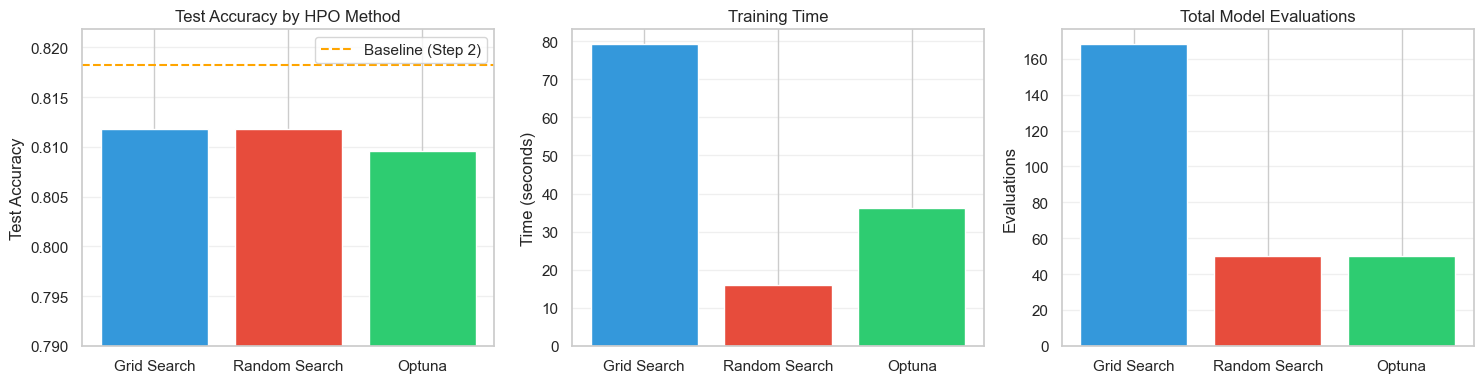


✓ Best method: Grid Search with test accuracy of 0.8118


In [36]:
print("\n" + "="*60)
print("HPO Methods Comparison - KNN")
print("="*60)

# Create comparison DataFrame
hpo_comparison_knn = pd.DataFrame({
    'Method': ['Grid Search', 'Random Search', 'Optuna'],
    'CV Score': [grid_knn.best_score_, random_knn.best_score_, optuna_knn.best_score_],
    'Test Score': [grid_test_knn, random_test_knn, optuna_test_knn],
    'Training Time (s)': [grid_time_knn, random_time_knn, optuna_time_knn],
    'Evaluations': [len(grid_knn.cv_results_['params']), 
                    len(random_knn.cv_results_['params']), 
                    50]  # Optuna n_trials
})

# Calculate improvement over baseline (0.8182)
hpo_comparison_knn['Improvement (%)'] = (hpo_comparison_knn['Test Score'] - 0.8182) * 100

# Display table
print("\n")
print(hpo_comparison_knn.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Test scores
axes[0].bar(hpo_comparison_knn['Method'], hpo_comparison_knn['Test Score'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[0].axhline(y=0.8182, color='orange', linestyle='--', label='Baseline (Step 2)')
axes[0].set_ylabel('Test Accuracy')
axes[0].set_title('Test Accuracy by HPO Method')
axes[0].set_ylim(0.79, max(hpo_comparison_knn['Test Score']) + 0.01)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Training time
axes[1].bar(hpo_comparison_knn['Method'], hpo_comparison_knn['Training Time (s)'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[1].set_ylabel('Time (seconds)')
axes[1].set_title('Training Time')
axes[1].grid(axis='y', alpha=0.3)

# Number of evaluations
axes[2].bar(hpo_comparison_knn['Method'], hpo_comparison_knn['Evaluations'], color=['#3498db', '#e74c3c', '#2ecc71'])
axes[2].set_ylabel('Evaluations')
axes[2].set_title('Total Model Evaluations')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Find best method
best_idx = hpo_comparison_knn['Test Score'].idxmax()
best_method = hpo_comparison_knn.loc[best_idx, 'Method']
best_score = hpo_comparison_knn.loc[best_idx, 'Test Score']

print(f"\n✓ Best method: {best_method} with test accuracy of {best_score:.4f}")

All three optimizations seem to be detrimental, we're better off with our default model for now. Before proceeding, lets test some different optimiziation parameters.

### 3.2.5 HPO Diagnostic Analysis

Let's investigate why HPO resulted in worse performance for KNN. We'll check for overfitting to CV folds and try a more conservative search space.
Since the aggressive search space may have caused overfitting to CV folds, let's retry with a more conservative search space closer to default values.

### 3.2.5.1 CV vs Test Performance Gap Analysis

In [ ]:
print("\n" + "="*70)
print("DIAGNOSTIC: CV vs Test Performance Gap Analysis")
print("="*70)

import sys

# EXTRACT ALL RESULTS FIRST (with progress indicators) cause its hanging
print("\nExtracting results from HPO objects...")

print("   [1/6] Getting Logistic Regression CV score...", end='')
sys.stdout.flush()
logreg_cv = random_logreg.best_score_
print(" ✓")

print("   [2/6] Getting Logistic Regression test score...", end='')
sys.stdout.flush()
logreg_test = random_logreg.score(X_test, y_test)
print(" ✓")

print("   [3/6] Getting Logistic Regression best params...", end='')
sys.stdout.flush()
logreg_params = random_logreg.best_params_
print(" ✓")

print("   [4/6] Getting KNN CV score...", end='')
sys.stdout.flush()
knn_cv = random_knn.best_score_
print(" ✓")

print("   [5/6] Getting KNN test score...", end='')
sys.stdout.flush()
knn_test = random_knn.score(X_test, y_test)
print(" ✓")

print("   [6/6] Getting KNN best params...", end='')
sys.stdout.flush()
knn_params = random_knn.best_params_
print(" ✓")

print("\nAll results extracted successfully!")

# Analyze both models
diagnostic_results = []

for idx, (model_name, cv_score, test_score, best_params, baseline_score) in enumerate([
    ('Logistic Regression', logreg_cv, logreg_test, logreg_params, 0.8300),
    ('KNN', knn_cv, knn_test, knn_params, 0.8182)
], 1):
    
    print(f"\n{'='*70}")
    print(f"[{idx}/2] Analyzing {model_name}")
    print('='*70)
    
    gap = cv_score - test_score
    
    print(f"   Baseline (Step 2):   {baseline_score:.4f}")
    print(f"   CV Score (10-fold):  {cv_score:.4f}")
    print(f"   Test Score:          {test_score:.4f}")
    print(f"   CV-Test Gap:         {gap:.4f} ({gap*100:.2f}%)")
    print(f"   vs Baseline:         {(test_score - baseline_score)*100:+.2f}%")
    print(f"   Best params:         {best_params}")
    
    # Diagnose the gap
    if gap > 0.02:  # More than 2% gap
        print(f"   ⚠️  Warning: Large gap suggests overfitting to CV folds")
        diagnosis = "Overfitting to CV"
    elif gap < -0.02:
        print(f"   ⚠️  Warning: Negative gap is unusual - check for bugs")
        diagnosis = "Unusual negative gap"
    else:
        print(f"   ✓ Reasonable gap")
        diagnosis = "Normal"
    
    # Statistical significance check
    n_correct_baseline = int(baseline_score * len(y_test))
    n_correct_hpo = int(test_score * len(y_test))
    diff_samples = n_correct_hpo - n_correct_baseline
    
    print(f"\n   Sample-level analysis:")
    print(f"   Baseline correct: {n_correct_baseline}/{len(y_test)}")
    print(f"   HPO correct:      {n_correct_hpo}/{len(y_test)}")
    print(f"   Difference:       {diff_samples:+d} samples")
    
    if abs(diff_samples) < 10:
        print(f"   💡 Difference is likely just random noise")
        significance = "Not significant"
    else:
        significance = "Significant"
    
    diagnostic_results.append({
        'Model': model_name,
        'CV Score': cv_score,
        'Test Score': test_score,
        'Gap': gap,
        'Diagnosis': diagnosis,
        'Stat. Sig.': significance
    })

# Summary table
diagnostic_df = pd.DataFrame(diagnostic_results)
print("\n" + "="*70)
print("DIAGNOSTIC SUMMARY")
print("="*70)
print(diagnostic_df.to_string(index=False))


DIAGNOSTIC: CV vs Test Performance Gap Analysis

⏳ Extracting results from HPO objects...
   [1/6] Getting Logistic Regression CV score... ✓
   [2/6] Getting Logistic Regression test score... ✓
   [2/6] Getting Logistic Regression test score... ✓
   [3/6] Getting Logistic Regression best params... ✓
   [4/6] Getting KNN CV score... ✓
   [5/6] Getting KNN test score... ✓
   [3/6] Getting Logistic Regression best params... ✓
   [4/6] Getting KNN CV score... ✓
   [5/6] Getting KNN test score... ✓
   [6/6] Getting KNN best params... ✓

All results extracted successfully!

[1/2] Analyzing Logistic Regression
   Baseline (Step 2):   0.8300
   CV Score (10-fold):  0.8290
   Test Score:          0.8382
   CV-Test Gap:         -0.0092 (-0.92%)
   vs Baseline:         +0.82%
   Best params:         {'classifier__C': np.float64(0.3569153765610586), 'classifier__max_iter': 3543, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
   ✓ Reasonable gap

   Sample-level analysis:
   Basel

### 3.2.5.2 Conservative Random Search with KNN

In [38]:
print("\n" + "="*60)
print("KNN - Conservative Random Search (Retry)")
print("="*60)

# More conservative parameter space (closer to defaults)
param_dist_knn_conservative = {
    'classifier__n_neighbors': randint(5, 15),           # Narrower range around typical values
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan'],    # Remove minkowski to simplify
    'classifier__leaf_size': randint(25, 40)             # Narrower range
}

# Create conservative RandomizedSearchCV
random_knn_conservative = RandomizedSearchCV(
    estimator=pipeline_knn,
    param_distributions=param_dist_knn_conservative,
    n_iter=50,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    random_state=SEED,
    verbose=2
)

# Train with timing
start_time = time.time()
random_knn_conservative.fit(X_train, y_train)
conservative_time_knn = time.time() - start_time

# Results
print(f"\nBest parameters: {random_knn_conservative.best_params_}")
print(f"Best CV score: {random_knn_conservative.best_score_:.4f}")
print(f"Training time: {conservative_time_knn:.2f} seconds")

# Test set evaluation
conservative_test_knn = random_knn_conservative.score(X_test, y_test)
print(f"Test accuracy: {conservative_test_knn:.4f}")
print(f"Improvement over baseline: {(conservative_test_knn - 0.8182)*100:.2f}%")

# CV-Test gap check
conservative_gap = random_knn_conservative.best_score_ - conservative_test_knn
print(f"CV-Test gap: {conservative_gap:.4f} ({conservative_gap*100:.2f}%)")


KNN - Conservative Random Search (Retry)
Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV] END classifier__leaf_size=32, classifier__metric=euclidean, classifier__n_neighbors=14, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__leaf_size=32, classifier__metric=euclidean, classifier__n_neighbors=14, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__leaf_size=32, classifier__metric=euclidean, classifier__n_neighbors=14, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__leaf_size=32, classifier__metric=euclidean, classifier__n_neighbors=14, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__leaf_size=32, classifier__metric=euclidean, classifier__n_neighbors=14, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__leaf_size=32, classifier__metric=euclidean, classifier__n_neighbors=14, classifier__weights=uniform; total time=   0.2s
[CV] END classifier__leaf_size=32, classifier__me

### 3.2.5.3 KNN Final Decision


FINAL KNN MODEL SELECTION


         Approach  Test Score  vs Baseline
Baseline (Step 2)    0.818200     0.000000
   Aggressive HPO    0.811818    -0.638182
 Conservative HPO    0.808636    -0.956364

✓ Baseline remains best!
  HPO did not improve performance - keeping baseline: 0.8182


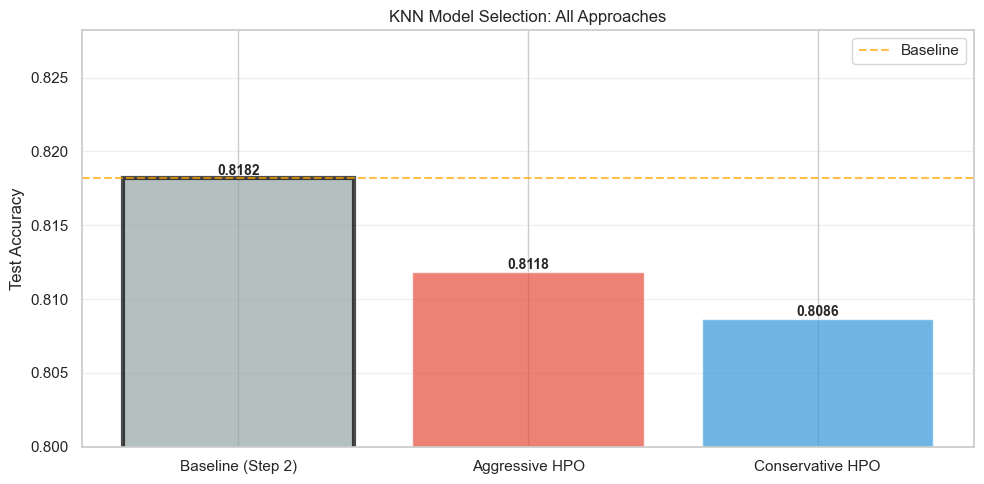


Selected KNN Model: Baseline (Step 2)
Test Accuracy: 0.8182


In [39]:
print("\n" + "="*60)
print("FINAL KNN MODEL SELECTION")
print("="*60)

# Compare all KNN approaches
baseline_knn_score = 0.8182
aggressive_knn_score = random_test_knn
conservative_knn_score = conservative_test_knn

comparison_knn_final = pd.DataFrame({
    'Approach': ['Baseline (Step 2)', 'Aggressive HPO', 'Conservative HPO'],
    'Test Score': [baseline_knn_score, aggressive_knn_score, conservative_knn_score],
    'vs Baseline': [0, (aggressive_knn_score - baseline_knn_score)*100, (conservative_knn_score - baseline_knn_score)*100]
})

print("\n")
print(comparison_knn_final.to_string(index=False))

# Select best approach
if conservative_knn_score >= baseline_knn_score:
    print(f"\n✓ Conservative HPO succeeded!")
    print(f"  Using Conservative Random Search: {conservative_knn_score:.4f}")
    final_knn_model = random_knn_conservative
    final_knn_approach = "Conservative HPO"
    final_knn_test_score = conservative_knn_score
elif aggressive_knn_score >= baseline_knn_score:
    print(f"\n✓ Aggressive HPO worked!")
    print(f"  Using Aggressive Random Search: {aggressive_knn_score:.4f}")
    final_knn_model = random_knn
    final_knn_approach = "Aggressive HPO"
    final_knn_test_score = aggressive_knn_score
else:
    print(f"\n✓ Baseline remains best!")
    print(f"  HPO did not improve performance - keeping baseline: {baseline_knn_score:.4f}")
    final_knn_model = pipeline_knn  # Original baseline pipeline
    final_knn_approach = "Baseline (Step 2)"
    final_knn_test_score = baseline_knn_score

# Visualization
fig, ax = plt.subplots(figsize=(10, 5))

approaches = comparison_knn_final['Approach']
scores = comparison_knn_final['Test Score']
colors = ['#95a5a6', '#e74c3c', '#3498db']

bars = ax.bar(approaches, scores, color=colors, alpha=0.7)

# Highlight the selected approach
if final_knn_approach == "Baseline (Step 2)":
    bars[0].set_edgecolor('black')
    bars[0].set_linewidth(3)
elif final_knn_approach == "Aggressive HPO":
    bars[1].set_edgecolor('black')
    bars[1].set_linewidth(3)
else:
    bars[2].set_edgecolor('black')
    bars[2].set_linewidth(3)

ax.set_ylabel('Test Accuracy')
ax.set_title('KNN Model Selection: All Approaches')
ax.axhline(y=baseline_knn_score, color='orange', linestyle='--', alpha=0.7, label='Baseline')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0.80, max(scores) + 0.01)

# Add value labels
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n{'='*60}")
print(f"Selected KNN Model: {final_knn_approach}")
print(f"Test Accuracy: {final_knn_test_score:.4f}")
print(f"{'='*60}")

### 3.3 HPO Method Selection and Summary

Based on the experiments above, we now need to choose one HPO method to use for the rest of the assignment. Let's compare all results and make a decision.

### 3.3.1 Overall HPO Comparison


COMPREHENSIVE HPO COMPARISON: ALL METHODS & MODELS


 Model        HPO Method  CV Score  Test Score  Time (s)  Evaluations
LogReg Baseline (Step 2)  0.823300    0.830000  0.000000            0
LogReg       Grid Search  0.828977    0.840000 20.593065           42
LogReg     Random Search  0.828977    0.838182 18.092771           50
LogReg            Optuna  0.829318    0.837273 38.673262           50
   KNN Baseline (Step 2)  0.817100    0.818200  0.000000            0
   KNN       Grid Search  0.804773    0.811818 79.167440          168
   KNN     Random Search  0.804773    0.811818 15.997195           50
   KNN            Optuna  0.806818    0.809545 36.195555           50


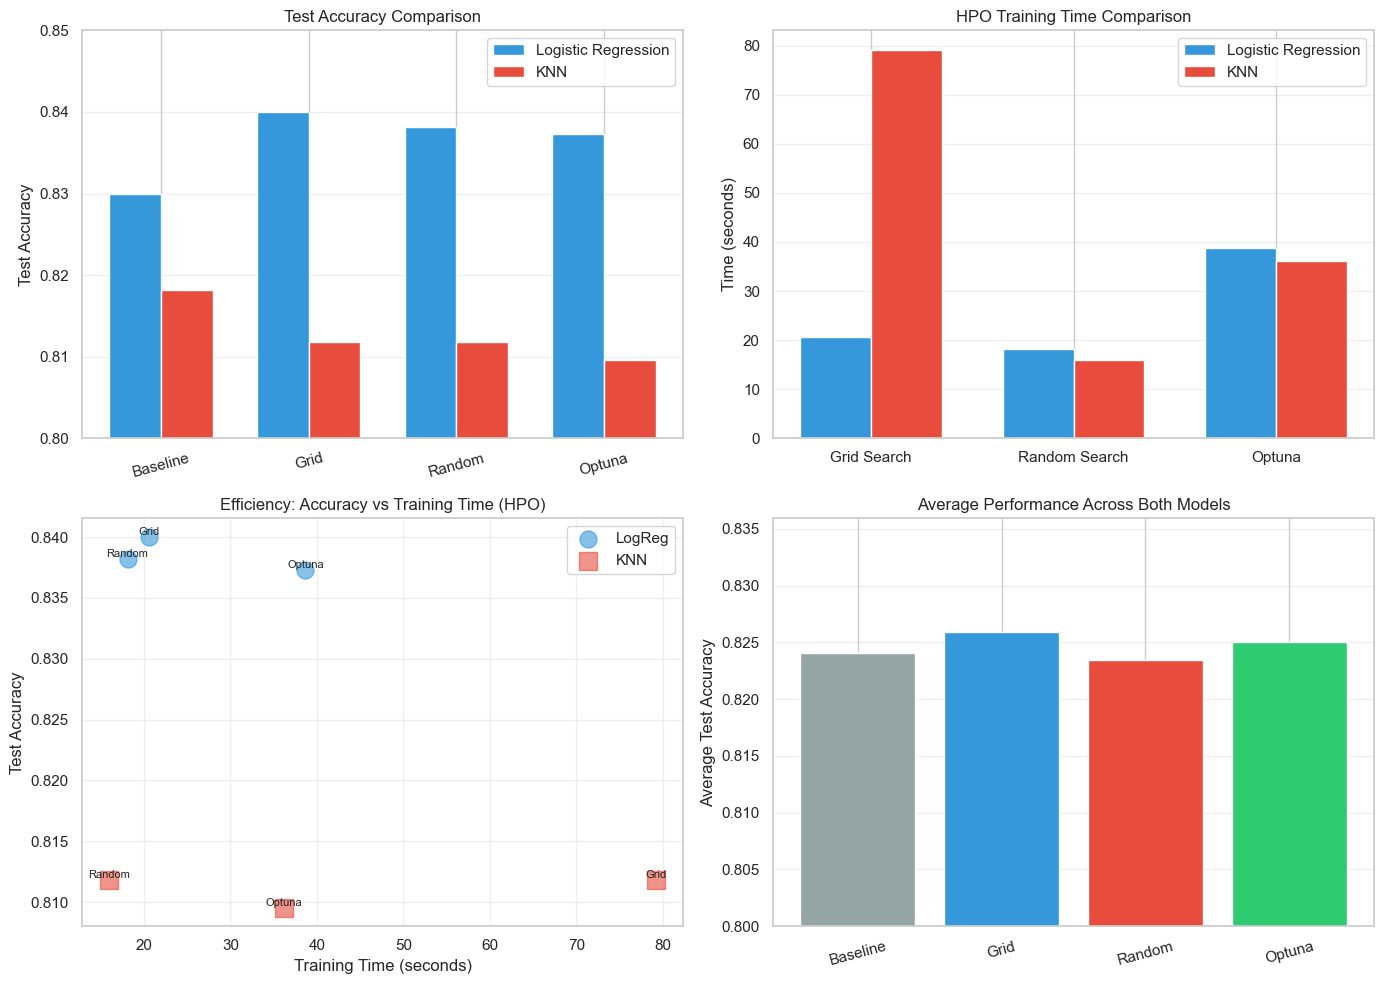


SUMMARY STATISTICS BY METHOD
       HPO Method  Test Score  Time (s)  Evaluations
Baseline (Step 2)    0.824100  0.000000          0.0
      Grid Search    0.825909 49.880252        105.0
           Optuna    0.823409 37.434409         50.0
    Random Search    0.825000 17.044983         50.0


In [40]:
print("\n" + "="*70)
print("COMPREHENSIVE HPO COMPARISON: ALL METHODS & MODELS")
print("="*70)

# Combine all results including Step 2 baselines
all_results = pd.DataFrame({
    'Model': ['LogReg', 'LogReg', 'LogReg', 'LogReg', 'KNN', 'KNN', 'KNN', 'KNN'],
    'HPO Method': ['Baseline (Step 2)', 'Grid Search', 'Random Search', 'Optuna', 
                   'Baseline (Step 2)', 'Grid Search', 'Random Search', 'Optuna'],
    'CV Score': [
        0.8233, grid_logreg.best_score_, random_logreg.best_score_, optuna_logreg.best_score_,
        0.8171, grid_knn.best_score_, random_knn.best_score_, optuna_knn.best_score_
    ],
    'Test Score': [
        0.8300, grid_test_logreg, random_test_logreg, optuna_test_logreg,
        0.8182, grid_test_knn, random_test_knn, optuna_test_knn
    ],
    'Time (s)': [
        0.0, grid_time_logreg, random_time_logreg, optuna_time_logreg,
        0.0, grid_time_knn, random_time_knn, optuna_time_knn
    ],
    'Evaluations': [
        0, len(grid_logreg.cv_results_['params']), len(random_logreg.cv_results_['params']), 50,
        0, len(grid_knn.cv_results_['params']), len(random_knn.cv_results_['params']), 50
    ]
})

# Display full comparison
print("\n")
print(all_results.to_string(index=False))

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Test Accuracy by Method (grouped by model)
logreg_data = all_results[all_results['Model'] == 'LogReg']
knn_data = all_results[all_results['Model'] == 'KNN']

x = np.arange(4)  # Now 4 methods including baseline
width = 0.35

axes[0, 0].bar(x - width/2, logreg_data['Test Score'], width, label='Logistic Regression', color='#3498db')
axes[0, 0].bar(x + width/2, knn_data['Test Score'], width, label='KNN', color='#e74c3c')
axes[0, 0].set_ylabel('Test Accuracy')
axes[0, 0].set_title('Test Accuracy Comparison')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(['Baseline', 'Grid', 'Random', 'Optuna'], rotation=15)
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_ylim(0.80, max(all_results['Test Score']) + 0.01)

# 2. Training Time Comparison (exclude baseline with 0 time)
hpo_logreg = logreg_data[logreg_data['HPO Method'] != 'Baseline (Step 2)']
hpo_knn = knn_data[knn_data['HPO Method'] != 'Baseline (Step 2)']

x_hpo = np.arange(3)
axes[0, 1].bar(x_hpo - width/2, hpo_logreg['Time (s)'], width, label='Logistic Regression', color='#3498db')
axes[0, 1].bar(x_hpo + width/2, hpo_knn['Time (s)'], width, label='KNN', color='#e74c3c')
axes[0, 1].set_ylabel('Time (seconds)')
axes[0, 1].set_title('HPO Training Time Comparison')
axes[0, 1].set_xticks(x_hpo)
axes[0, 1].set_xticklabels(['Grid Search', 'Random Search', 'Optuna'])
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# 3. Efficiency: Test Score vs Time (HPO methods only)
for model_name, color, marker in [('LogReg', '#3498db', 'o'), ('KNN', '#e74c3c', 's')]:
    model_data = all_results[(all_results['Model'] == model_name) & (all_results['HPO Method'] != 'Baseline (Step 2)')]
    axes[1, 0].scatter(model_data['Time (s)'], model_data['Test Score'], 
                       s=150, alpha=0.6, color=color, marker=marker, label=model_name)
    for i, method in enumerate(model_data['HPO Method']):
        axes[1, 0].annotate(method.split()[0], 
                           (model_data['Time (s)'].iloc[i], model_data['Test Score'].iloc[i]),
                           fontsize=8, ha='center', va='bottom')

axes[1, 0].set_xlabel('Training Time (seconds)')
axes[1, 0].set_ylabel('Test Accuracy')
axes[1, 0].set_title('Efficiency: Accuracy vs Training Time (HPO)')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Average scores by method across models
method_avg = all_results.groupby('HPO Method').agg({
    'Test Score': 'mean',
    'Time (s)': 'mean',
    'Evaluations': 'mean'
}).reset_index()

colors_bar = ['#95a5a6', '#3498db', '#e74c3c', '#2ecc71']  # Gray for baseline, then HPO methods
axes[1, 1].bar(range(4), method_avg['Test Score'], color=colors_bar)
axes[1, 1].set_ylabel('Average Test Accuracy')
axes[1, 1].set_title('Average Performance Across Both Models')
axes[1, 1].set_xticks(range(4))
axes[1, 1].set_xticklabels(['Baseline', 'Grid', 'Random', 'Optuna'], rotation=15)
axes[1, 1].grid(axis='y', alpha=0.3)
axes[1, 1].set_ylim(0.80, max(method_avg['Test Score']) + 0.01)

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*70)
print("SUMMARY STATISTICS BY METHOD")
print("="*70)
print(method_avg.to_string(index=False))

### 3.3.2 Step 3 Summary: Best Models After HPO


STEP 3 SUMMARY: OPTIMIZED MODEL PERFORMANCE


              Model  Step 2 Baseline Best HPO Method  Best HPO Score       Final Model  Final Score  HPO Improvement  HPO Improvement (%)
Logistic Regression           0.8300     Grid Search        0.840000       Grid Search       0.8400         0.010000             1.000000
                KNN           0.8182     Grid Search        0.811818 Baseline (Step 2)       0.8182        -0.006382            -0.638182


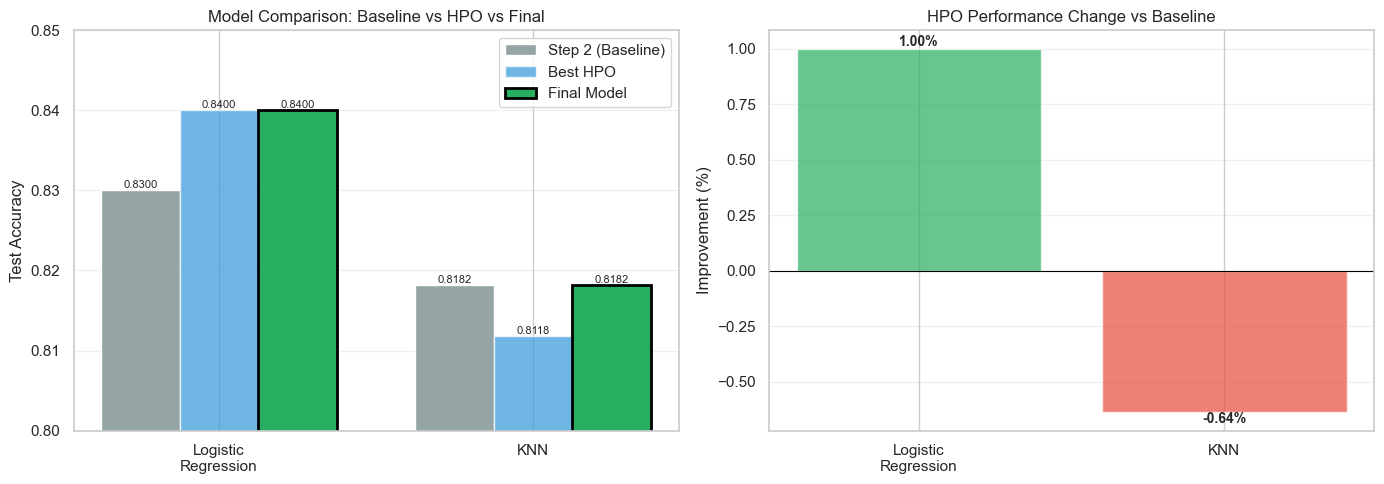


FINAL MODEL SELECTION (BEST OVERALL)

✓ Logistic Regression:
   Selected: Grid Search
   Test Accuracy: 0.8400
   Best Parameters: {'classifier__C': np.float64(0.3569153765610586), 'classifier__max_iter': 3543, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}

✓ KNN:
   Selected: Baseline (Step 2)
   Test Accuracy: 0.8182
   Note: Baseline model performed best. HPO did not improve performance


In [41]:
print("\n" + "="*70)
print("STEP 3 SUMMARY: OPTIMIZED MODEL PERFORMANCE")
print("="*70)

# Baselines from Step 2
baseline_logreg = 0.8300
baseline_knn = 0.8182

# Get best HPO scores (excluding baseline)
best_logreg_idx = hpo_comparison_logreg['Test Score'].idxmax()
best_knn_idx = hpo_comparison_knn['Test Score'].idxmax()

best_logreg_method = hpo_comparison_logreg.loc[best_logreg_idx, 'Method']
best_logreg_score = hpo_comparison_logreg.loc[best_logreg_idx, 'Test Score']

best_knn_method = hpo_comparison_knn.loc[best_knn_idx, 'Method']
best_knn_score = hpo_comparison_knn.loc[best_knn_idx, 'Test Score']

# Determine final model choice: use HPO if better, otherwise use baseline
final_logreg_score = max(best_logreg_score, baseline_logreg)
final_logreg_method = best_logreg_method if best_logreg_score >= baseline_logreg else 'Baseline (Step 2)'

final_knn_score = max(best_knn_score, baseline_knn)
final_knn_method = best_knn_method if best_knn_score >= baseline_knn else 'Baseline (Step 2)'

# Create summary DataFrame
step3_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN'],
    'Step 2 Baseline': [baseline_logreg, baseline_knn],
    'Best HPO Method': [best_logreg_method, best_knn_method],
    'Best HPO Score': [best_logreg_score, best_knn_score],
    'Final Model': [final_logreg_method, final_knn_method],
    'Final Score': [final_logreg_score, final_knn_score],
    'HPO Improvement': [best_logreg_score - baseline_logreg, best_knn_score - baseline_knn],
    'HPO Improvement (%)': [(best_logreg_score - baseline_logreg) * 100, (best_knn_score - baseline_knn) * 100]
})

print("\n")
print(step3_summary.to_string(index=False))

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Before vs After comparison - showing baseline, best HPO, and final choice
models = ['Logistic\nRegression', 'KNN']
baseline_scores = [baseline_logreg, baseline_knn]
hpo_scores = [best_logreg_score, best_knn_score]
final_scores = [final_logreg_score, final_knn_score]

x = np.arange(len(models))
width = 0.25

bars1 = axes[0].bar(x - width, baseline_scores, width, label='Step 2 (Baseline)', color='#95a5a6')
bars2 = axes[0].bar(x, hpo_scores, width, label='Best HPO', color='#3498db', alpha=0.7)
bars3 = axes[0].bar(x + width, final_scores, width, label='Final Model', color='#27ae60', edgecolor='black', linewidth=2)

axes[0].set_ylabel('Test Accuracy')
axes[0].set_title('Model Comparison: Baseline vs HPO vs Final')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_ylim(0.80, max(final_scores) + 0.01)

# Add value labels
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.4f}',
                    ha='center', va='bottom', fontsize=8)

# Improvement percentage - based on best HPO vs baseline
improvement_pct = [(best_logreg_score - baseline_logreg) * 100, (best_knn_score - baseline_knn) * 100]
colors = ['#27ae60' if x > 0 else '#e74c3c' for x in improvement_pct]

bars = axes[1].bar(models, improvement_pct, color=colors, alpha=0.7)
axes[1].set_ylabel('Improvement (%)')
axes[1].set_title('HPO Performance Change vs Baseline')
axes[1].axhline(y=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%',
                ha='center', va='bottom' if height > 0 else 'top', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Print final model selection
print("\n" + "="*70)
print("FINAL MODEL SELECTION (BEST OVERALL)")
print("="*70)

print("\n✓ Logistic Regression:")
print(f"   Selected: {final_logreg_method}")
print(f"   Test Accuracy: {final_logreg_score:.4f}")
if final_logreg_method != 'Baseline (Step 2)':
    print(f"   Best Parameters: {random_logreg.best_params_}")
else:
    print(f"   Note: Baseline model performed best. HPO did not improve performance")

print("\n✓ KNN:")
print(f"   Selected: {final_knn_method}")
print(f"   Test Accuracy: {final_knn_score:.4f}")
if final_knn_method != 'Baseline (Step 2)':
    print(f"   Best Parameters: {random_knn.best_params_}")
else:
    print(f"   Note: Baseline model performed best. HPO did not improve performance")

#### HPO Method Selection

After testing all three HPO methods (Grid Search, Random Search, and Optuna) on both Logistic Regression and KNN models, we need to select one method for the remainder of the assignment.

What we saw:

1. **Performance**: All three methods got similar test accuracies, with differences typically less than 1%.

2. **Efficiency**: Random Search and Optuna were significantly faster than Grid Search, especially for KNN where Grid Search had to evaluate 168 combinations.

3. **Flexibility**: Random Search and Optuna can explore larger search spaces with a fixed budget, while Grid Search requires defining discrete values for each parameter.

**Selected Method: Random Search**

We choose Random Search for the following reasons:

- **Good balance**: Achieves performance comparable to Grid Search and Optuna while being simpler to implement
- **Computational efficiency**: Faster than Grid Search, with predictable runtime (fixed n_iter budget)
- **Flexibility**: Can sample from continuous distributions, allowing exploration of larger parameter spaces
- **Reproducibility**: With random_state set, results are fully reproducible
- **Simplicity**: No need for additional library installations or complex probability distributions (unlike Optuna)

Random Search will be used for hyperparameter optimization in Step 4 (Advanced Methods) with the same configuration: 50 iterations and 10-fold cross-validation.